In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut, cross_val_score, GridSearchCV

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import (accuracy_score, 
                            confusion_matrix, 
                            classification_report,
                            f1_score,
                            plot_confusion_matrix,
                            precision_recall_curve,
                            precision_score,
                            recall_score)

In [5]:
pwd

'C:\\Users\\tsuts\\dsi\\07-week\\Mass-Protests\\users'

In [6]:
mass = pd.read_csv('../data/mass_mobile.csv')

In [7]:
mass.head(2)

,Unnamed: 0,id,country,ccode,region,protestnumber,protesterviolence,location,protesteridentity,sources,...,social_restrictions,start_date,end_date,target,notes_clean,neg,neu,pos,compound,protest_duration
0,0,201990001,Canada,20,North America,1,0.0,national,unspecified,1. great canadian train journeys into history;...,...,0,1990-01-15,1990-01-15,"[0, 0, 0, 0, 1, 0, 0]",canada s railway passenger system was finally ...,0.087,0.913,0.0,-0.8176,1
1,1,201990002,Canada,20,North America,2,0.0,"Montreal, Quebec",unspecified,1. autonomy s cry revived in quebec the new yo...,...,0,1990-06-25,1990-06-25,"[0, 0, 0, 0, 1, 0, 0]",protestors were only identified as young peopl...,0.000,1.000,0.0,0.0000,1


In [8]:
mass.drop(columns=['Unnamed: 0'], inplace=True)

In [9]:
# all columns for easy copy and paste 
sorted(list(mass.columns))

['accomodation',
 'arrests',
 'beatings',
 'ccode',
 'compound',
 'country',
 'country_Afghanistan',
 'country_Albania',
 'country_Algeria',
 'country_Angola',
 'country_Argentina',
 'country_Armenia',
 'country_Austria',
 'country_Azerbaijan',
 'country_Bahrain',
 'country_Bangladesh',
 'country_Belarus',
 'country_Belgium',
 'country_Benin',
 'country_Bolivia',
 'country_Bosnia',
 'country_Botswana',
 'country_Brazil',
 'country_Bulgaria',
 'country_Burkina Faso',
 'country_Burundi',
 'country_Cambodia',
 'country_Cameroon',
 'country_Canada',
 'country_Cape Verde',
 'country_Central African Republic',
 'country_Chad',
 'country_Chile',
 'country_China',
 'country_Colombia',
 'country_Comoros',
 'country_Congo Brazzaville',
 'country_Congo Kinshasa',
 'country_Costa Rica',
 'country_Croatia',
 'country_Cuba',
 'country_Cyprus',
 'country_Czech Republic',
 'country_Czechoslovakia',
 'country_Denmark',
 'country_Djibouti',
 'country_Dominican Republic',
 'country_Ecuador',
 'country_Eg

In [63]:
mass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15179 entries, 0 to 15178
Columns: 248 entries, id to shootings_probability
dtypes: float64(17), int64(219), object(12)
memory usage: 28.7+ MB


## Visualizations

In [79]:
list(mass.columns)

['id',
 'country',
 'ccode',
 'region',
 'protestnumber',
 'protesterviolence',
 'location',
 'protesteridentity',
 'sources',
 'notes',
 'protester_id_type',
 'partipants_number',
 'protest_size_category',
 'pop_male',
 'pop_female',
 'pop_total',
 'pop_density',
 'prosperity_2020',
 'country_Afghanistan',
 'country_Albania',
 'country_Algeria',
 'country_Angola',
 'country_Argentina',
 'country_Armenia',
 'country_Austria',
 'country_Azerbaijan',
 'country_Bahrain',
 'country_Bangladesh',
 'country_Belarus',
 'country_Belgium',
 'country_Benin',
 'country_Bolivia',
 'country_Bosnia',
 'country_Botswana',
 'country_Brazil',
 'country_Bulgaria',
 'country_Burkina Faso',
 'country_Burundi',
 'country_Cambodia',
 'country_Cameroon',
 'country_Canada',
 'country_Cape Verde',
 'country_Central African Republic',
 'country_Chad',
 'country_Chile',
 'country_China',
 'country_Colombia',
 'country_Comoros',
 'country_Congo Brazzaville',
 'country_Congo Kinshasa',
 'country_Costa Rica',
 'coun

In [80]:
mass['protest_size_category']

0        1,000-4,999
1        1,000-4,999
2            100-999
3            100-999
4            100-999
            ...     
15174        100-999
15175    1,000-4,999
15176          50-99
15177          50-99
15178        100-999
Name: protest_size_category, Length: 15179, dtype: object

In [73]:
mass[['arrests','accomodation','beatings','crowddispersal','ignore','killings','shootings']].sum()

arrests           2143
accomodation      1521
beatings           800
crowddispersal    4758
ignore            8249
killings           824
shootings          931
dtype: int64

In [105]:
mass.groupby('protest_size_category')['shootings'].value_counts(normalize=True) #,'accomodation','beatings','crowddispersal','ignore','killings','shootings')

protest_size_category  shootings
1,000-4,999            0            0.931461
                       1            0.068539
10,000-100,000         0            0.955513
                       1            0.044487
100-999                0            0.937632
                       1            0.062368
5,000-9,999            0            0.953125
                       1            0.046875
50-99                  0            0.932568
                       1            0.067432
Less than 50           0            0.920000
                       1            0.080000
Over 100,000           0            0.967480
                       1            0.032520
Name: shootings, dtype: float64

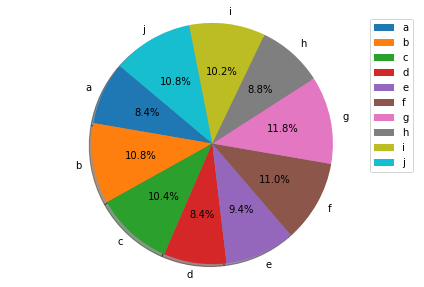

In [106]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.DataFrame({'Category': np.random.choice(list('abcdefghij'), 500)})
sizes = data['Category'].value_counts().sort_index() / data['Category'].value_counts().sum() * 100
plt.pie(sizes, labels=sizes.index,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.legend(sizes.index, loc="best")
plt.tight_layout()
plt.show()

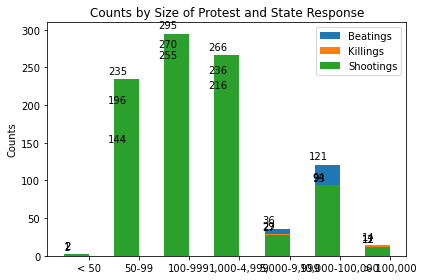

In [116]:

    
labels = ['< 50', '50-99', '100-999',
          '1,000-4,999', '5,000-9,999','10,000-100,000', 
         '> 100,000']
#arrests = [7, 525, 787, 479, 65, 231, 49]
#accomodation = [1, 282, 486, 384, 64, 256, 48]
beatings = [2, 144, 270, 216, 36, 121, 11]
#crowddispersal = [5, 1218, 1518, 1167, 172, 575, 103]
#ignore = [13, 1764, 2366, 2222, 338, 1312, 234]
killings = [1, 196, 255, 236, 29, 93, 14]
shootings = [2, 235, 295, 266, 27, 94, 12]

x = np.arange(len(labels))  # the label locations
width = .5  # the width of the bars

fig, ax = plt.subplots()
#arrest_rect = ax.bar(x - width/7, arrests, width, label='Arrests')
#accomodation_rect = ax.bar(x + width/7, accomodation, width, label='Accomodations')
beatings_rect = ax.bar(x - width/2, beatings, width, label='Beatings')
#crowddispersal_rect = ax.bar(x - width/7, crowddispersal, width, label='Crowd Dispersal')
#ignore_rect = ax.bar(x - width/3, ignore, width, label='Ignore')
killings_rect = ax.bar(x - width/2, killings, width, label='Killings')
shootings_rect = ax.bar(x - width/2, shootings, width, label='Shootings')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Counts')
ax.set_title('Counts by Size of Protest and State Response')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 7, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(beatings_rect)
autolabel(killings_rect)
autolabel(shootings_rect)

fig.tight_layout()

plt.show()

## Macro Functions 

In [48]:
def state_response_predictor(df, features, target, model):
    '''This function runs a model, makes predictions, calls evaluate_model() to 
    evaluate various train and test scores using those predictions, and uses response_prediction_columns() 
    to create prediction and probability columns'''
    X = features 
    y = df[target]
    
    # train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48)
    
    # scale data
    ss = StandardScaler()
    X_train_sc = ss.fit_transform(X_train)
    X_test_sc = ss.transform(X_test)
    
    # fit model 
    model.fit(X_train_sc, y_train)
    
    # predict on train and test set 
    y_preds_train = model.predict(X_train_sc)
    y_preds_test = model.predict(X_test_sc)
    
    # evaluate various train and test set classification metrics
    f1_score_train, precision_train, recall_train = evaluate_model(y_train, y_preds_train)
    f1_score_test, precision_test, recall_test = evaluate_model(y_test, y_preds_test)
    
#     print(f'{target}- F1_score for {model} model, train set: {f1_score_train}')
#     print(f'{target}- F1_score for {model} model, test set: {f1_score_test}')
#     print(f'{target}- Precision for {model} model, train set: {precision_train}')
#     print(f'{target}- Precision for {model} model, test set: {precision_test}')
#     print(f'{target}- Recall for {model} model, train set: {recall_train}')
#     print(f'{target}- Recall for {model} model, teset set: {recall_test}')

    # call response_prediction_columns() to create prediction and probability columns
    predicted_column, probability_column = response_prediction_columns(model, df, features)
    
    # confusion_matrix 
    cf_matrix = plot_confusion_matrix(logreg, X_test_sc, y_test, cmap='Blues', display_labels=['other response', f'{target}'])
    
    
    return predicted_column, probability_column, f1_score_train, f1_score_test, precision_train, precision_test, recall_train, recall_test, cf_matrix 

In [12]:
def response_prediction_columns(model, df, features):
    '''Creates predicted and probability columns'''
    
    # scale data on entire data set
    ss = StandardScaler()
    X = features
    X_sc = ss.fit_transform(X)
    
    # make predictions
    predicted_column = model.predict(X_sc)
    probability_column = model.predict_proba(X_sc)[:,1]
    
    return predicted_column, probability_column

In [13]:
def evaluate_model(y_true, y_preds):
    '''Building a function that returns F1, precision, and recall scores '''
    
    f1 = f1_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)

    return f1, precision, recall

In [149]:
# def build_confusion_matrix(y_true, y_preds, title): # in progress
    '''Build a confusion matrix'''
#     tn, fp, fn, tp = confusion_matrix(y_true, y_preds).ravel()
#     disp = plot_confusion_matrix(model, 
#                                  X_test_sc, 
#                                  y_test, 
# #                                  display_labels=
#                                  cmap="Blues")
    
#     disp.ax_.set_title(title)
#     print(title)
#     print(disp.confusion_matrix)
    
#     plt.show
    
#     return

IndentationError: unexpected indent (<ipython-input-149-3c3e8468805b>, line 2)

In [14]:
list(mass.columns)

['id',
 'country',
 'ccode',
 'region',
 'protestnumber',
 'protesterviolence',
 'location',
 'protesteridentity',
 'sources',
 'notes',
 'protester_id_type',
 'partipants_number',
 'protest_size_category',
 'pop_male',
 'pop_female',
 'pop_total',
 'pop_density',
 'prosperity_2020',
 'country_Afghanistan',
 'country_Albania',
 'country_Algeria',
 'country_Angola',
 'country_Argentina',
 'country_Armenia',
 'country_Austria',
 'country_Azerbaijan',
 'country_Bahrain',
 'country_Bangladesh',
 'country_Belarus',
 'country_Belgium',
 'country_Benin',
 'country_Bolivia',
 'country_Bosnia',
 'country_Botswana',
 'country_Brazil',
 'country_Bulgaria',
 'country_Burkina Faso',
 'country_Burundi',
 'country_Cambodia',
 'country_Cameroon',
 'country_Canada',
 'country_Cape Verde',
 'country_Central African Republic',
 'country_Chad',
 'country_Chile',
 'country_China',
 'country_Colombia',
 'country_Comoros',
 'country_Congo Brazzaville',
 'country_Congo Kinshasa',
 'country_Costa Rica',
 'coun

## GridSearch Section

In [154]:
features = mass.drop(columns=['country', 'ccode', 'region', 'location','protesteridentity', 'sources',
       'notes', 'protester_id_type', 'protest_size_category', 'start_date', 'notes_clean', 'neg', 'neu', 'pos',
       'end_date', 'target', 'arrests', 'accomodation', 'beatings',
       'crowddispersal', 'ignore', 'killings', 'shootings'])
X = features
y = mass['arrests']

logreg = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48)

ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

params = {
    'penalty' : ['l1','l2'], 
    'C' : [.01, 1, 10],
    'solver' : ['liblinear', 'saga', 'lfgbs'],
    'max_iter' : [100, 1000]
}

gs = GridSearchCV(logreg, param_grid=params, cv=10, verbose=2)

gs.fit(X_train_sc, y_train)

gs.best_score_

Fitting 10 folds for each of 36 candidates, totalling 360 fits
[CV] C=0.01, max_iter=100, penalty=l1, solver=liblinear ..............
[CV]  C=0.01, max_iter=100, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=0.01, max_iter=100, penalty=l1, solver=liblinear ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  C=0.01, max_iter=100, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=0.01, max_iter=100, penalty=l1, solver=liblinear ..............
[CV]  C=0.01, max_iter=100, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=0.01, max_iter=100, penalty=l1, solver=liblinear ..............
[CV]  C=0.01, max_iter=100, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=0.01, max_iter=100, penalty=l1, solver=liblinear ..............
[CV]  C=0.01, max_iter=100, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=0.01, max_iter=100, penalty=l1, solver=liblinear ..............
[CV]  C=0.01, max_iter=100, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=0.01, max_iter=100, penalty=l1, solver=liblinear ..............
[CV]  C=0.01, max_iter=100, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=0.01, max_iter=100, penalty=l1, solver=liblinear ..............
[CV]  C=0.01, max_iter=100, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=0.01, max_iter=100, penalty=l1, solver=liblinear ..............

C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 433, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=0.01, max_iter=100, penalty=l2, solver=liblinear, total=   0.4s
[CV] C=0.01, max_iter=100, penalty=l2, solver=liblinear ..............
[CV]  C=0.01, max_iter=100, penalty=l2, solver=liblinear, total=   0.4s
[CV] C=0.01, max_iter=100, penalty=l2, solver=liblinear ..............
[CV]  C=0.01, max_iter=100, penalty=l2, solver=liblinear, total=   0.4s
[CV] C=0.01, max_iter=100, penalty=l2, solver=liblinear ..............
[CV]  C=0.01, max_iter=100, penalty=l2, solver=liblinear, total=   0.4s
[CV] C=0.01, max_iter=100, penalty=l2, solver=liblinear ..............
[CV]  C=0.01, max_iter=100, penalty=l2, solver=liblinear, total=   0.4s
[CV] C=0.01, max_iter=100, penalty=l2, solver=liblinear ..............
[CV]  C=0.01, max_iter=100, penalty=l2, solver=liblinear, total=   0.4s
[CV] C=0.01, max_iter=100, penalty=l2, solver=liblinear ..............
[CV]  C=0.01, max_iter=100, penalty=l2, solver=liblinear, total=   0.4s
[CV] C=0.01, max_iter=100, penalty=l2, solver=liblinear ..............

C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l2, solver=saga, total=   2.0s
[CV] C=0.01, max_iter=100, penalty=l2, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l2, solver=saga, total=   1.7s
[CV] C=0.01, max_iter=100, penalty=l2, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l2, solver=saga, total=   1.7s
[CV] C=0.01, max_iter=100, penalty=l2, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l2, solver=saga, total=   1.7s
[CV] C=0.01, max_iter=100, penalty=l2, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l2, solver=saga, total=   1.7s
[CV] C=0.01, max_iter=100, penalty=l2, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l2, solver=saga, total=   1.7s
[CV] C=0.01, max_iter=100, penalty=l2, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=0.01, max_iter=100, penalty=l2, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=0.01, max_iter=100, penalty=l2, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l2, solver=saga, total=   1.9s
[CV] C=0.01, max_iter=100, penalty=l2, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 433, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
V

[CV] .... C=0.01, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=0.01, max_iter=100, penalty=l2, solver=lfgbs ..................
[CV] ... C=0.01, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l2, solver=lfgbs ..................
[CV] ... C=0.01, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l2, solver=lfgbs ..................
[CV] ... C=0.01, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l2, solver=lfgbs ..................
[CV] ... C=0.01, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l2, solver=lfgbs ..................
[CV] ... C=0.01, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l2, solver=lfgbs ..................
[CV] ... C=0.01, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l2, solver=lfgbs ..................
[CV] .

C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 433, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=0.01, max_iter=1000, penalty=l2, solver=liblinear, total=   0.4s
[CV] C=0.01, max_iter=1000, penalty=l2, solver=liblinear .............
[CV]  C=0.01, max_iter=1000, penalty=l2, solver=liblinear, total=   0.4s
[CV] C=0.01, max_iter=1000, penalty=l2, solver=liblinear .............
[CV]  C=0.01, max_iter=1000, penalty=l2, solver=liblinear, total=   0.4s
[CV] C=0.01, max_iter=1000, penalty=l2, solver=liblinear .............
[CV]  C=0.01, max_iter=1000, penalty=l2, solver=liblinear, total=   0.4s
[CV] C=0.01, max_iter=1000, penalty=l2, solver=liblinear .............
[CV]  C=0.01, max_iter=1000, penalty=l2, solver=liblinear, total=   0.4s
[CV] C=0.01, max_iter=1000, penalty=l2, solver=liblinear .............
[CV]  C=0.01, max_iter=1000, penalty=l2, solver=liblinear, total=   0.4s
[CV] C=0.01, max_iter=1000, penalty=l2, solver=liblinear .............
[CV]  C=0.01, max_iter=1000, penalty=l2, solver=liblinear, total=   0.4s
[CV] C=0.01, max_iter=1000, penalty=l2, solver=liblinear ......

C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 433, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV] .. C=1, max_iter=100, penalty=l1, solver=liblinear, total=   5.8s
[CV] C=1, max_iter=100, penalty=l1, solver=liblinear .................
[CV] .. C=1, max_iter=100, penalty=l1, solver=liblinear, total=   4.1s
[CV] C=1, max_iter=100, penalty=l1, solver=liblinear .................
[CV] .. C=1, max_iter=100, penalty=l1, solver=liblinear, total=   5.7s
[CV] C=1, max_iter=100, penalty=l1, solver=liblinear .................
[CV] .. C=1, max_iter=100, penalty=l1, solver=liblinear, total=   5.9s
[CV] C=1, max_iter=100, penalty=l1, solver=liblinear .................
[CV] .. C=1, max_iter=100, penalty=l1, solver=liblinear, total=   4.3s
[CV] C=1, max_iter=100, penalty=l1, solver=liblinear .................
[CV] .. C=1, max_iter=100, penalty=l1, solver=liblinear, total=   4.1s
[CV] C=1, max_iter=100, penalty=l1, solver=liblinear .................
[CV] .. C=1, max_iter=100, penalty=l1, solver=liblinear, total=   6.3s
[CV] C=1, max_iter=100, penalty=l1, solver=liblinear .................
[CV] .

C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l1, solver=saga, total=   3.0s
[CV] C=1, max_iter=100, penalty=l1, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l1, solver=saga, total=   3.0s
[CV] C=1, max_iter=100, penalty=l1, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l1, solver=saga, total=   3.0s
[CV] C=1, max_iter=100, penalty=l1, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l1, solver=saga, total=   2.9s
[CV] C=1, max_iter=100, penalty=l1, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l1, solver=saga, total=   2.9s
[CV] C=1, max_iter=100, penalty=l1, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l1, solver=saga, total=   3.0s
[CV] C=1, max_iter=100, penalty=l1, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l1, solver=saga, total=   2.9s
[CV] C=1, max_iter=100, penalty=l1, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l1, solver=saga, total=   3.1s
[CV] C=1, max_iter=100, penalty=l1, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l1, solver=saga, total=   3.0s
[CV] C=1, max_iter=100, penalty=l1, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 433, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
V

[CV] ....... C=1, max_iter=100, penalty=l1, solver=saga, total=   3.0s
[CV] C=1, max_iter=100, penalty=l1, solver=lfgbs .....................
[CV] ...... C=1, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=100, penalty=l1, solver=lfgbs .....................
[CV] ...... C=1, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=100, penalty=l1, solver=lfgbs .....................
[CV] ...... C=1, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=100, penalty=l1, solver=lfgbs .....................
[CV] ...... C=1, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=100, penalty=l1, solver=lfgbs .....................
[CV] ...... C=1, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=100, penalty=l1, solver=lfgbs .....................
[CV] ...... C=1, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=100, penalty=l1, solver=lfgbs .....................
[CV] .

C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l2, solver=saga, total=   1.9s
[CV] C=1, max_iter=100, penalty=l2, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=1, max_iter=100, penalty=l2, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=1, max_iter=100, penalty=l2, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=1, max_iter=100, penalty=l2, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l2, solver=saga, total=   1.7s
[CV] C=1, max_iter=100, penalty=l2, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=1, max_iter=100, penalty=l2, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=1, max_iter=100, penalty=l2, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l2, solver=saga, total=   1.7s
[CV] C=1, max_iter=100, penalty=l2, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=1, max_iter=100, penalty=l2, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 433, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
V

[CV] ....... C=1, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=1, max_iter=100, penalty=l2, solver=lfgbs .....................
[CV] ...... C=1, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=100, penalty=l2, solver=lfgbs .....................
[CV] ...... C=1, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=100, penalty=l2, solver=lfgbs .....................
[CV] ...... C=1, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=100, penalty=l2, solver=lfgbs .....................
[CV] ...... C=1, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=100, penalty=l2, solver=lfgbs .....................
[CV] ...... C=1, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=100, penalty=l2, solver=lfgbs .....................
[CV] ...... C=1, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=100, penalty=l2, solver=lfgbs .....................
[CV] .

C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l1, solver=saga, total=  24.7s
[CV] C=1, max_iter=1000, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l1, solver=saga, total=  24.2s
[CV] C=1, max_iter=1000, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l1, solver=saga, total=  25.0s
[CV] C=1, max_iter=1000, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l1, solver=saga, total=  25.3s
[CV] C=1, max_iter=1000, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l1, solver=saga, total=  24.2s
[CV] C=1, max_iter=1000, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l1, solver=saga, total=  24.0s
[CV] C=1, max_iter=1000, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l1, solver=saga, total=  23.9s
[CV] C=1, max_iter=1000, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l1, solver=saga, total=  24.4s
[CV] C=1, max_iter=1000, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l1, solver=saga, total=  24.2s
[CV] C=1, max_iter=1000, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 433, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
V

[CV] ...... C=1, max_iter=1000, penalty=l1, solver=saga, total=  24.1s
[CV] C=1, max_iter=1000, penalty=l1, solver=lfgbs ....................
[CV] ..... C=1, max_iter=1000, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l1, solver=lfgbs ....................
[CV] ..... C=1, max_iter=1000, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l1, solver=lfgbs ....................
[CV] ..... C=1, max_iter=1000, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l1, solver=lfgbs ....................
[CV] ..... C=1, max_iter=1000, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l1, solver=lfgbs ....................
[CV] ..... C=1, max_iter=1000, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l1, solver=lfgbs ....................
[CV] ..... C=1, max_iter=1000, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l1, solver=lfgbs ....................
[CV] .

C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l2, solver=saga, total=  18.2s
[CV] C=1, max_iter=1000, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l2, solver=saga, total=  17.7s
[CV] C=1, max_iter=1000, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l2, solver=saga, total=  17.7s
[CV] C=1, max_iter=1000, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l2, solver=saga, total=  17.8s
[CV] C=1, max_iter=1000, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l2, solver=saga, total=  17.7s
[CV] C=1, max_iter=1000, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l2, solver=saga, total=  18.5s
[CV] C=1, max_iter=1000, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l2, solver=saga, total=  17.5s
[CV] C=1, max_iter=1000, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l2, solver=saga, total=  17.7s
[CV] C=1, max_iter=1000, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l2, solver=saga, total=  17.7s
[CV] C=1, max_iter=1000, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 433, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
V

[CV] ...... C=1, max_iter=1000, penalty=l2, solver=saga, total=  18.0s
[CV] C=1, max_iter=1000, penalty=l2, solver=lfgbs ....................
[CV] ..... C=1, max_iter=1000, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l2, solver=lfgbs ....................
[CV] ..... C=1, max_iter=1000, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l2, solver=lfgbs ....................
[CV] ..... C=1, max_iter=1000, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l2, solver=lfgbs ....................
[CV] ..... C=1, max_iter=1000, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l2, solver=lfgbs ....................
[CV] ..... C=1, max_iter=1000, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l2, solver=lfgbs ....................
[CV] ..... C=1, max_iter=1000, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l2, solver=lfgbs ....................
[CV] .

C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l1, solver=saga, total=   3.4s
[CV] C=10, max_iter=100, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l1, solver=saga, total=   3.3s
[CV] C=10, max_iter=100, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l1, solver=saga, total=   3.7s
[CV] C=10, max_iter=100, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l1, solver=saga, total=   3.4s
[CV] C=10, max_iter=100, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l1, solver=saga, total=   3.4s
[CV] C=10, max_iter=100, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l1, solver=saga, total=   3.4s
[CV] C=10, max_iter=100, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l1, solver=saga, total=   3.4s
[CV] C=10, max_iter=100, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l1, solver=saga, total=   3.4s
[CV] C=10, max_iter=100, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l1, solver=saga, total=   3.4s
[CV] C=10, max_iter=100, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 433, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
V

[CV] ...... C=10, max_iter=100, penalty=l1, solver=saga, total=   3.5s
[CV] C=10, max_iter=100, penalty=l1, solver=lfgbs ....................
[CV] ..... C=10, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=100, penalty=l1, solver=lfgbs ....................
[CV] ..... C=10, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=100, penalty=l1, solver=lfgbs ....................
[CV] ..... C=10, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=100, penalty=l1, solver=lfgbs ....................
[CV] ..... C=10, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=100, penalty=l1, solver=lfgbs ....................
[CV] ..... C=10, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=100, penalty=l1, solver=lfgbs ....................
[CV] ..... C=10, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=100, penalty=l1, solver=lfgbs ....................
[CV] .

C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l2, solver=saga, total=   2.1s
[CV] C=10, max_iter=100, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=10, max_iter=100, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=10, max_iter=100, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=10, max_iter=100, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=10, max_iter=100, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=10, max_iter=100, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l2, solver=saga, total=   1.9s
[CV] C=10, max_iter=100, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=10, max_iter=100, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l2, solver=saga, total=   2.0s
[CV] C=10, max_iter=100, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 433, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
V

[CV] ...... C=10, max_iter=100, penalty=l2, solver=saga, total=   2.0s
[CV] C=10, max_iter=100, penalty=l2, solver=lfgbs ....................
[CV] ..... C=10, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=100, penalty=l2, solver=lfgbs ....................
[CV] ..... C=10, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=100, penalty=l2, solver=lfgbs ....................
[CV] ..... C=10, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=100, penalty=l2, solver=lfgbs ....................
[CV] ..... C=10, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=100, penalty=l2, solver=lfgbs ....................
[CV] ..... C=10, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=100, penalty=l2, solver=lfgbs ....................
[CV] ..... C=10, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=100, penalty=l2, solver=lfgbs ....................
[CV] .

C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l1, solver=saga, total=  25.8s
[CV] C=10, max_iter=1000, penalty=l1, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l1, solver=saga, total=  27.1s
[CV] C=10, max_iter=1000, penalty=l1, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l1, solver=saga, total=  26.5s
[CV] C=10, max_iter=1000, penalty=l1, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l1, solver=saga, total=  25.7s
[CV] C=10, max_iter=1000, penalty=l1, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l1, solver=saga, total=  25.2s
[CV] C=10, max_iter=1000, penalty=l1, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l1, solver=saga, total=  25.3s
[CV] C=10, max_iter=1000, penalty=l1, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l1, solver=saga, total=  25.1s
[CV] C=10, max_iter=1000, penalty=l1, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l1, solver=saga, total=  26.1s
[CV] C=10, max_iter=1000, penalty=l1, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l1, solver=saga, total=  26.7s
[CV] C=10, max_iter=1000, penalty=l1, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 433, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
V

[CV] ..... C=10, max_iter=1000, penalty=l1, solver=saga, total=  25.4s
[CV] C=10, max_iter=1000, penalty=l1, solver=lfgbs ...................
[CV] .... C=10, max_iter=1000, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l1, solver=lfgbs ...................
[CV] .... C=10, max_iter=1000, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l1, solver=lfgbs ...................
[CV] .... C=10, max_iter=1000, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l1, solver=lfgbs ...................
[CV] .... C=10, max_iter=1000, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l1, solver=lfgbs ...................
[CV] .... C=10, max_iter=1000, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l1, solver=lfgbs ...................
[CV] .... C=10, max_iter=1000, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l1, solver=lfgbs ...................
[CV] .

C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l2, solver=saga, total=  18.8s
[CV] C=10, max_iter=1000, penalty=l2, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l2, solver=saga, total=  18.1s
[CV] C=10, max_iter=1000, penalty=l2, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l2, solver=saga, total=  18.3s
[CV] C=10, max_iter=1000, penalty=l2, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l2, solver=saga, total=  18.3s
[CV] C=10, max_iter=1000, penalty=l2, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l2, solver=saga, total=  17.8s
[CV] C=10, max_iter=1000, penalty=l2, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l2, solver=saga, total=  18.2s
[CV] C=10, max_iter=1000, penalty=l2, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l2, solver=saga, total=  18.4s
[CV] C=10, max_iter=1000, penalty=l2, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l2, solver=saga, total=  17.9s
[CV] C=10, max_iter=1000, penalty=l2, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l2, solver=saga, total=  18.0s
[CV] C=10, max_iter=1000, penalty=l2, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 433, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
V

[CV] ..... C=10, max_iter=1000, penalty=l2, solver=saga, total=  18.4s
[CV] C=10, max_iter=1000, penalty=l2, solver=lfgbs ...................
[CV] .... C=10, max_iter=1000, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l2, solver=lfgbs ...................
[CV] .... C=10, max_iter=1000, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l2, solver=lfgbs ...................
[CV] .... C=10, max_iter=1000, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l2, solver=lfgbs ...................
[CV] .... C=10, max_iter=1000, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l2, solver=lfgbs ...................
[CV] .... C=10, max_iter=1000, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l2, solver=lfgbs ...................
[CV] .... C=10, max_iter=1000, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l2, solver=lfgbs ...................
[CV] .

C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


0.8602486762801608

In [164]:
targets = ['arrests','accomodation','beatings','crowddispersal','ignore','killings','shootings']  

grids = []


for target in targets:    
    features = mass.drop(columns=['country', 'ccode', 'region', 'location','protesteridentity', 'sources',
           'notes', 'protester_id_type', 'protest_size_category', 'start_date', 'notes_clean', 'neg', 'neu', 'pos',
           'end_date', 'target', 'arrests', 'accomodation', 'beatings',
           'crowddispersal', 'ignore', 'killings', 'shootings'])
    X = features
    y = mass[target]

    logreg = LogisticRegression()

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48)

    ss = StandardScaler()
    X_train_sc = ss.fit_transform(X_train)
    X_test_sc = ss.transform(X_test)

    params = {
        'penalty' : ['l1','l2'], 
        'C' : [.01, 1, 10],
        'solver' : ['liblinear', 'saga', 'lfgbs'],
        'max_iter' : [100, 1000]
    }
    
    gs = GridSearchCV(logreg, param_grid=params, cv=10, verbose=2)
    #print(y)
    grids.append(gs)
        

0        0
1        0
2        0
3        0
4        1
        ..
15174    0
15175    0
15176    0
15177    0
15178    0
Name: arrests, Length: 15179, dtype: int64
0        0
1        0
2        0
3        1
4        1
        ..
15174    0
15175    0
15176    1
15177    0
15178    0
Name: accomodation, Length: 15179, dtype: int64
0        0
1        0
2        0
3        0
4        0
        ..
15174    0
15175    0
15176    0
15177    0
15178    0
Name: beatings, Length: 15179, dtype: int64
0        0
1        0
2        0
3        0
4        1
        ..
15174    1
15175    1
15176    0
15177    1
15178    0
Name: crowddispersal, Length: 15179, dtype: int64
0        1
1        1
2        1
3        0
4        0
        ..
15174    0
15175    0
15176    0
15177    0
15178    1
Name: ignore, Length: 15179, dtype: int64
0        0
1        0
2        0
3        0
4        0
        ..
15174    0
15175    1
15176    0
15177    0
15178    0
Name: killings, Length: 15179, dtype: int64
0  

In [165]:
grids

[GridSearchCV(cv=10, estimator=LogisticRegression(),
              param_grid={'C': [0.01, 1, 10], 'max_iter': [100, 1000],
                          'penalty': ['l1', 'l2'],
                          'solver': ['liblinear', 'saga', 'lfgbs']},
              verbose=2),
 GridSearchCV(cv=10, estimator=LogisticRegression(),
              param_grid={'C': [0.01, 1, 10], 'max_iter': [100, 1000],
                          'penalty': ['l1', 'l2'],
                          'solver': ['liblinear', 'saga', 'lfgbs']},
              verbose=2),
 GridSearchCV(cv=10, estimator=LogisticRegression(),
              param_grid={'C': [0.01, 1, 10], 'max_iter': [100, 1000],
                          'penalty': ['l1', 'l2'],
                          'solver': ['liblinear', 'saga', 'lfgbs']},
              verbose=2),
 GridSearchCV(cv=10, estimator=LogisticRegression(),
              param_grid={'C': [0.01, 1, 10], 'max_iter': [100, 1000],
                          'penalty': ['l1', 'l2'],
               

In [ ]:

results = {
    'best_cv_scores' : [],
    'best_params' : [],
    'train_f1_scores' : [],
    'test_f1_scores' : [],
    'train_precision_scores' : [], 
    'test_precision_scores' : [],
    'train_recall_scores' : [],
    'test_recall_scores' : []
}


for grid in grids: 
    
    # fit grids
    grid.fit(X_train_sc, y_train)
    
    # append important grid results
    results['best_params'].append(grid.best_params_)
    results['best_cv_scores'].append(grid.best_score_)
    
    # make predictions 
    train_preds = grid.predict(X_train_sc)
    test_preds = grid.predict(X_test_sc)
    
    # various classification metrics
    # f1 scores
    results['train_f1_scores'].append(f1_score(y_train, train_preds))
    results['test_f1_scores'].append(f1_score(y_test, test_preds))
    
    # precision scores 
    results['train_precision_scores'].append(precision_score(y_train, train_preds))
    results['test_precision_scores'].append(precision_score(y_test, test_preds))
    
    # recall scores
    results['train_recall_scores'].append(recall_score(y_train, train_preds))
    results['test_recall_scores'].append(recall_score(y_test, test_preds))

Fitting 10 folds for each of 36 candidates, totalling 360 fits
[CV] C=0.01, max_iter=100, penalty=l1, solver=liblinear ..............
[CV]  C=0.01, max_iter=100, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=0.01, max_iter=100, penalty=l1, solver=liblinear ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  C=0.01, max_iter=100, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=0.01, max_iter=100, penalty=l1, solver=liblinear ..............
[CV]  C=0.01, max_iter=100, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=0.01, max_iter=100, penalty=l1, solver=liblinear ..............
[CV]  C=0.01, max_iter=100, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=0.01, max_iter=100, penalty=l1, solver=liblinear ..............
[CV]  C=0.01, max_iter=100, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=0.01, max_iter=100, penalty=l1, solver=liblinear ..............
[CV]  C=0.01, max_iter=100, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=0.01, max_iter=100, penalty=l1, solver=liblinear ..............
[CV]  C=0.01, max_iter=100, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=0.01, max_iter=100, penalty=l1, solver=liblinear ..............
[CV]  C=0.01, max_iter=100, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=0.01, max_iter=100, penalty=l1, solver=liblinear ..............

C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l1, solver=saga, total=   2.5s
[CV] C=0.01, max_iter=100, penalty=l1, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l1, solver=saga, total=   2.5s
[CV] C=0.01, max_iter=100, penalty=l1, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l1, solver=saga, total=   2.4s
[CV] C=0.01, max_iter=100, penalty=l1, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l1, solver=saga, total=   2.4s
[CV] C=0.01, max_iter=100, penalty=l1, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l1, solver=saga, total=   2.5s
[CV] C=0.01, max_iter=100, penalty=l1, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l1, solver=saga, total=   2.5s
[CV] C=0.01, max_iter=100, penalty=l1, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l1, solver=saga, total=   2.5s
[CV] C=0.01, max_iter=100, penalty=l1, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l1, solver=saga, total=   2.6s
[CV] C=0.01, max_iter=100, penalty=l1, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l1, solver=saga, total=   2.5s
[CV] C=0.01, max_iter=100, penalty=l1, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 433, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
V

[CV] .... C=0.01, max_iter=100, penalty=l1, solver=saga, total=   2.5s
[CV] C=0.01, max_iter=100, penalty=l1, solver=lfgbs ..................
[CV] ... C=0.01, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l1, solver=lfgbs ..................
[CV] ... C=0.01, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l1, solver=lfgbs ..................
[CV] ... C=0.01, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l1, solver=lfgbs ..................
[CV] ... C=0.01, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l1, solver=lfgbs ..................
[CV] ... C=0.01, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l1, solver=lfgbs ..................
[CV] ... C=0.01, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l1, solver=lfgbs ..................
[CV] .

C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l2, solver=saga, total=   1.7s
[CV] C=0.01, max_iter=100, penalty=l2, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=0.01, max_iter=100, penalty=l2, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=0.01, max_iter=100, penalty=l2, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=0.01, max_iter=100, penalty=l2, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=0.01, max_iter=100, penalty=l2, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=0.01, max_iter=100, penalty=l2, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l2, solver=saga, total=   1.7s
[CV] C=0.01, max_iter=100, penalty=l2, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=0.01, max_iter=100, penalty=l2, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=0.01, max_iter=100, penalty=l2, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 433, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
V

[CV] .... C=0.01, max_iter=100, penalty=l2, solver=saga, total=   1.7s
[CV] C=0.01, max_iter=100, penalty=l2, solver=lfgbs ..................
[CV] ... C=0.01, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l2, solver=lfgbs ..................
[CV] ... C=0.01, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l2, solver=lfgbs ..................
[CV] ... C=0.01, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l2, solver=lfgbs ..................
[CV] ... C=0.01, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l2, solver=lfgbs ..................
[CV] ... C=0.01, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l2, solver=lfgbs ..................
[CV] ... C=0.01, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l2, solver=lfgbs ..................
[CV] .

C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 433, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=0.01, max_iter=1000, penalty=l2, solver=liblinear, total=   0.4s
[CV] C=0.01, max_iter=1000, penalty=l2, solver=liblinear .............
[CV]  C=0.01, max_iter=1000, penalty=l2, solver=liblinear, total=   0.4s
[CV] C=0.01, max_iter=1000, penalty=l2, solver=liblinear .............
[CV]  C=0.01, max_iter=1000, penalty=l2, solver=liblinear, total=   0.4s
[CV] C=0.01, max_iter=1000, penalty=l2, solver=liblinear .............
[CV]  C=0.01, max_iter=1000, penalty=l2, solver=liblinear, total=   0.4s
[CV] C=0.01, max_iter=1000, penalty=l2, solver=liblinear .............
[CV]  C=0.01, max_iter=1000, penalty=l2, solver=liblinear, total=   0.4s
[CV] C=0.01, max_iter=1000, penalty=l2, solver=liblinear .............
[CV]  C=0.01, max_iter=1000, penalty=l2, solver=liblinear, total=   0.4s
[CV] C=0.01, max_iter=1000, penalty=l2, solver=liblinear .............
[CV]  C=0.01, max_iter=1000, penalty=l2, solver=liblinear, total=   0.3s
[CV] C=0.01, max_iter=1000, penalty=l2, solver=liblinear ......

C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 433, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV] .. C=1, max_iter=100, penalty=l1, solver=liblinear, total=  13.8s
[CV] C=1, max_iter=100, penalty=l1, solver=liblinear .................
[CV] .. C=1, max_iter=100, penalty=l1, solver=liblinear, total=  10.7s
[CV] C=1, max_iter=100, penalty=l1, solver=liblinear .................
[CV] .. C=1, max_iter=100, penalty=l1, solver=liblinear, total=  16.4s
[CV] C=1, max_iter=100, penalty=l1, solver=liblinear .................
[CV] .. C=1, max_iter=100, penalty=l1, solver=liblinear, total=  14.6s
[CV] C=1, max_iter=100, penalty=l1, solver=liblinear .................
[CV] .. C=1, max_iter=100, penalty=l1, solver=liblinear, total=  14.8s
[CV] C=1, max_iter=100, penalty=l1, solver=liblinear .................
[CV] .. C=1, max_iter=100, penalty=l1, solver=liblinear, total=  12.9s
[CV] C=1, max_iter=100, penalty=l1, solver=liblinear .................
[CV] .. C=1, max_iter=100, penalty=l1, solver=liblinear, total=  22.6s
[CV] C=1, max_iter=100, penalty=l1, solver=liblinear .................
[CV] .

C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l1, solver=saga, total=   3.5s
[CV] C=1, max_iter=100, penalty=l1, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l1, solver=saga, total=   3.2s
[CV] C=1, max_iter=100, penalty=l1, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l1, solver=saga, total=   3.3s
[CV] C=1, max_iter=100, penalty=l1, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l1, solver=saga, total=   3.1s
[CV] C=1, max_iter=100, penalty=l1, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l1, solver=saga, total=   3.1s
[CV] C=1, max_iter=100, penalty=l1, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l1, solver=saga, total=   3.4s
[CV] C=1, max_iter=100, penalty=l1, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l1, solver=saga, total=   3.0s
[CV] C=1, max_iter=100, penalty=l1, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l1, solver=saga, total=   3.1s
[CV] C=1, max_iter=100, penalty=l1, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l1, solver=saga, total=   3.1s
[CV] C=1, max_iter=100, penalty=l1, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 433, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
V

[CV] ....... C=1, max_iter=100, penalty=l1, solver=saga, total=   3.1s
[CV] C=1, max_iter=100, penalty=l1, solver=lfgbs .....................
[CV] ...... C=1, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=100, penalty=l1, solver=lfgbs .....................
[CV] ...... C=1, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=100, penalty=l1, solver=lfgbs .....................
[CV] ...... C=1, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=100, penalty=l1, solver=lfgbs .....................
[CV] ...... C=1, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=100, penalty=l1, solver=lfgbs .....................
[CV] ...... C=1, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=100, penalty=l1, solver=lfgbs .....................
[CV] ...... C=1, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=100, penalty=l1, solver=lfgbs .....................
[CV] .

C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=1, max_iter=100, penalty=l2, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=1, max_iter=100, penalty=l2, solver=saga ......................
[CV] ....... C=1, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=1, max_iter=100, penalty=l2, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=1, max_iter=100, penalty=l2, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=1, max_iter=100, penalty=l2, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l2, solver=saga, total=   1.9s
[CV] C=1, max_iter=100, penalty=l2, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=1, max_iter=100, penalty=l2, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l2, solver=saga, total=   1.9s
[CV] C=1, max_iter=100, penalty=l2, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=1, max_iter=100, penalty=l2, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 433, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
V

[CV] ....... C=1, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=1, max_iter=100, penalty=l2, solver=lfgbs .....................
[CV] ...... C=1, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=100, penalty=l2, solver=lfgbs .....................
[CV] ...... C=1, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=100, penalty=l2, solver=lfgbs .....................
[CV] ...... C=1, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=100, penalty=l2, solver=lfgbs .....................
[CV] ...... C=1, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=100, penalty=l2, solver=lfgbs .....................
[CV] ...... C=1, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=100, penalty=l2, solver=lfgbs .....................
[CV] ...... C=1, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=100, penalty=l2, solver=lfgbs .....................
[CV] .

C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l1, solver=saga, total=  24.5s
[CV] C=1, max_iter=1000, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l1, solver=saga, total=  24.9s
[CV] C=1, max_iter=1000, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l1, solver=saga, total=  24.8s
[CV] C=1, max_iter=1000, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l1, solver=saga, total=  24.8s
[CV] C=1, max_iter=1000, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l1, solver=saga, total=  24.9s
[CV] C=1, max_iter=1000, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l1, solver=saga, total=  24.8s
[CV] C=1, max_iter=1000, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l1, solver=saga, total=  24.6s
[CV] C=1, max_iter=1000, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l1, solver=saga, total=  24.9s
[CV] C=1, max_iter=1000, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l1, solver=saga, total=  24.4s
[CV] C=1, max_iter=1000, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 433, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
V

[CV] ...... C=1, max_iter=1000, penalty=l1, solver=saga, total=  24.4s
[CV] C=1, max_iter=1000, penalty=l1, solver=lfgbs ....................
[CV] ..... C=1, max_iter=1000, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l1, solver=lfgbs ....................
[CV] ..... C=1, max_iter=1000, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l1, solver=lfgbs ....................
[CV] ..... C=1, max_iter=1000, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l1, solver=lfgbs ....................
[CV] ..... C=1, max_iter=1000, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l1, solver=lfgbs ....................
[CV] ..... C=1, max_iter=1000, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l1, solver=lfgbs ....................
[CV] ..... C=1, max_iter=1000, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l1, solver=lfgbs ....................
[CV] .

C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l2, solver=saga, total=  17.9s
[CV] C=1, max_iter=1000, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l2, solver=saga, total=  18.2s
[CV] C=1, max_iter=1000, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l2, solver=saga, total=  18.5s
[CV] C=1, max_iter=1000, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l2, solver=saga, total=  19.1s
[CV] C=1, max_iter=1000, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l2, solver=saga, total=  18.8s
[CV] C=1, max_iter=1000, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l2, solver=saga, total=  18.4s
[CV] C=1, max_iter=1000, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l2, solver=saga, total=  18.7s
[CV] C=1, max_iter=1000, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l2, solver=saga, total=  18.0s
[CV] C=1, max_iter=1000, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l2, solver=saga, total=  17.8s
[CV] C=1, max_iter=1000, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 433, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
V

[CV] ...... C=1, max_iter=1000, penalty=l2, solver=saga, total=  18.0s
[CV] C=1, max_iter=1000, penalty=l2, solver=lfgbs ....................
[CV] ..... C=1, max_iter=1000, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l2, solver=lfgbs ....................
[CV] ..... C=1, max_iter=1000, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l2, solver=lfgbs ....................
[CV] ..... C=1, max_iter=1000, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l2, solver=lfgbs ....................
[CV] ..... C=1, max_iter=1000, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l2, solver=lfgbs ....................
[CV] ..... C=1, max_iter=1000, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l2, solver=lfgbs ....................
[CV] ..... C=1, max_iter=1000, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l2, solver=lfgbs ....................
[CV] .

C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l1, solver=saga, total=   3.8s
[CV] C=10, max_iter=100, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l1, solver=saga, total=   3.9s
[CV] C=10, max_iter=100, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l1, solver=saga, total=   3.9s
[CV] C=10, max_iter=100, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l1, solver=saga, total=   3.9s
[CV] C=10, max_iter=100, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l1, solver=saga, total=   3.9s
[CV] C=10, max_iter=100, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l1, solver=saga, total=   3.9s
[CV] C=10, max_iter=100, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l1, solver=saga, total=   3.9s
[CV] C=10, max_iter=100, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l1, solver=saga, total=   3.9s
[CV] C=10, max_iter=100, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l1, solver=saga, total=   3.8s
[CV] C=10, max_iter=100, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 433, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
V

[CV] ...... C=10, max_iter=100, penalty=l1, solver=saga, total=   4.0s
[CV] C=10, max_iter=100, penalty=l1, solver=lfgbs ....................
[CV] ..... C=10, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=100, penalty=l1, solver=lfgbs ....................
[CV] ..... C=10, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=100, penalty=l1, solver=lfgbs ....................
[CV] ..... C=10, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=100, penalty=l1, solver=lfgbs ....................
[CV] ..... C=10, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=100, penalty=l1, solver=lfgbs ....................
[CV] ..... C=10, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=100, penalty=l1, solver=lfgbs ....................
[CV] ..... C=10, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=100, penalty=l1, solver=lfgbs ....................
[CV] .

C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=10, max_iter=100, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=10, max_iter=100, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=10, max_iter=100, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=10, max_iter=100, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=10, max_iter=100, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=10, max_iter=100, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=10, max_iter=100, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=10, max_iter=100, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=10, max_iter=100, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 433, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
V

[CV] ...... C=10, max_iter=100, penalty=l2, solver=saga, total=   1.9s
[CV] C=10, max_iter=100, penalty=l2, solver=lfgbs ....................
[CV] ..... C=10, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=100, penalty=l2, solver=lfgbs ....................
[CV] ..... C=10, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=100, penalty=l2, solver=lfgbs ....................
[CV] ..... C=10, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=100, penalty=l2, solver=lfgbs ....................
[CV] ..... C=10, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=100, penalty=l2, solver=lfgbs ....................
[CV] ..... C=10, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=100, penalty=l2, solver=lfgbs ....................
[CV] ..... C=10, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=100, penalty=l2, solver=lfgbs ....................
[CV] .

C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l1, solver=saga, total=  31.5s
[CV] C=10, max_iter=1000, penalty=l1, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l1, solver=saga, total=  31.1s
[CV] C=10, max_iter=1000, penalty=l1, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l1, solver=saga, total=  31.1s
[CV] C=10, max_iter=1000, penalty=l1, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l1, solver=saga, total=  31.2s
[CV] C=10, max_iter=1000, penalty=l1, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l1, solver=saga, total=  33.2s
[CV] C=10, max_iter=1000, penalty=l1, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l1, solver=saga, total=  31.2s
[CV] C=10, max_iter=1000, penalty=l1, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l1, solver=saga, total=  32.8s
[CV] C=10, max_iter=1000, penalty=l1, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l1, solver=saga, total=  32.1s
[CV] C=10, max_iter=1000, penalty=l1, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l1, solver=saga, total=  31.0s
[CV] C=10, max_iter=1000, penalty=l1, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 433, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
V

[CV] ..... C=10, max_iter=1000, penalty=l1, solver=saga, total=  32.1s
[CV] C=10, max_iter=1000, penalty=l1, solver=lfgbs ...................
[CV] .... C=10, max_iter=1000, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l1, solver=lfgbs ...................
[CV] .... C=10, max_iter=1000, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l1, solver=lfgbs ...................
[CV] .... C=10, max_iter=1000, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l1, solver=lfgbs ...................
[CV] .... C=10, max_iter=1000, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l1, solver=lfgbs ...................
[CV] .... C=10, max_iter=1000, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l1, solver=lfgbs ...................
[CV] .... C=10, max_iter=1000, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l1, solver=lfgbs ...................
[CV] .

C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l2, solver=saga, total=  17.5s
[CV] C=10, max_iter=1000, penalty=l2, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l2, solver=saga, total=  17.7s
[CV] C=10, max_iter=1000, penalty=l2, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l2, solver=saga, total=  17.4s
[CV] C=10, max_iter=1000, penalty=l2, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l2, solver=saga, total=  17.8s
[CV] C=10, max_iter=1000, penalty=l2, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l2, solver=saga, total=  17.5s
[CV] C=10, max_iter=1000, penalty=l2, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l2, solver=saga, total=  17.3s
[CV] C=10, max_iter=1000, penalty=l2, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l2, solver=saga, total=  17.4s
[CV] C=10, max_iter=1000, penalty=l2, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l2, solver=saga, total=  17.6s
[CV] C=10, max_iter=1000, penalty=l2, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l2, solver=saga, total=  17.4s
[CV] C=10, max_iter=1000, penalty=l2, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 433, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
V

[CV] ..... C=10, max_iter=1000, penalty=l2, solver=saga, total=  17.3s
[CV] C=10, max_iter=1000, penalty=l2, solver=lfgbs ...................
[CV] .... C=10, max_iter=1000, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l2, solver=lfgbs ...................
[CV] .... C=10, max_iter=1000, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l2, solver=lfgbs ...................
[CV] .... C=10, max_iter=1000, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l2, solver=lfgbs ...................
[CV] .... C=10, max_iter=1000, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l2, solver=lfgbs ...................
[CV] .... C=10, max_iter=1000, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l2, solver=lfgbs ...................
[CV] .... C=10, max_iter=1000, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l2, solver=lfgbs ...................
[CV] .

C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 10 folds for each of 36 candidates, totalling 360 fits
[CV] C=0.01, max_iter=100, penalty=l1, solver=liblinear ..............
[CV]  C=0.01, max_iter=100, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=0.01, max_iter=100, penalty=l1, solver=liblinear ..............
[CV]  C=0.01, max_iter=100, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=0.01, max_iter=100, penalty=l1, solver=liblinear ..............
[CV]  C=0.01, max_iter=100, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=0.01, max_iter=100, penalty=l1, solver=liblinear ..............
[CV]  C=0.01, max_iter=100, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=0.01, max_iter=100, penalty=l1, solver=liblinear ..............
[CV]  C=0.01, max_iter=100, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=0.01, max_iter=100, penalty=l1, solver=liblinear ..............
[CV]  C=0.01, max_iter=100, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=0.01, max_iter=100, penalty=l1, solver=liblinear ..............
[CV]  C=

C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l1, solver=saga, total=   2.4s
[CV] C=0.01, max_iter=100, penalty=l1, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l1, solver=saga, total=   2.4s
[CV] C=0.01, max_iter=100, penalty=l1, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l1, solver=saga, total=   2.5s
[CV] C=0.01, max_iter=100, penalty=l1, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l1, solver=saga, total=   2.4s
[CV] C=0.01, max_iter=100, penalty=l1, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l1, solver=saga, total=   2.5s
[CV] C=0.01, max_iter=100, penalty=l1, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l1, solver=saga, total=   2.5s
[CV] C=0.01, max_iter=100, penalty=l1, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l1, solver=saga, total=   2.5s
[CV] C=0.01, max_iter=100, penalty=l1, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l1, solver=saga, total=   2.6s
[CV] C=0.01, max_iter=100, penalty=l1, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l1, solver=saga, total=   2.4s
[CV] C=0.01, max_iter=100, penalty=l1, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 433, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
V

[CV] .... C=0.01, max_iter=100, penalty=l1, solver=saga, total=   2.5s
[CV] C=0.01, max_iter=100, penalty=l1, solver=lfgbs ..................
[CV] ... C=0.01, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l1, solver=lfgbs ..................
[CV] ... C=0.01, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l1, solver=lfgbs ..................
[CV] ... C=0.01, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l1, solver=lfgbs ..................
[CV] ... C=0.01, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l1, solver=lfgbs ..................
[CV] ... C=0.01, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l1, solver=lfgbs ..................
[CV] ... C=0.01, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l1, solver=lfgbs ..................
[CV] .

C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=0.01, max_iter=100, penalty=l2, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=0.01, max_iter=100, penalty=l2, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=0.01, max_iter=100, penalty=l2, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=0.01, max_iter=100, penalty=l2, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l2, solver=saga, total=   1.9s
[CV] C=0.01, max_iter=100, penalty=l2, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l2, solver=saga, total=   1.7s
[CV] C=0.01, max_iter=100, penalty=l2, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=0.01, max_iter=100, penalty=l2, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l2, solver=saga, total=   1.7s
[CV] C=0.01, max_iter=100, penalty=l2, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=0.01, max_iter=100, penalty=l2, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 433, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
V

[CV] .... C=0.01, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=0.01, max_iter=100, penalty=l2, solver=lfgbs ..................
[CV] ... C=0.01, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l2, solver=lfgbs ..................
[CV] ... C=0.01, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l2, solver=lfgbs ..................
[CV] ... C=0.01, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l2, solver=lfgbs ..................
[CV] ... C=0.01, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l2, solver=lfgbs ..................
[CV] ... C=0.01, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l2, solver=lfgbs ..................
[CV] ... C=0.01, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l2, solver=lfgbs ..................
[CV] .

C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 433, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=0.01, max_iter=1000, penalty=l2, solver=liblinear, total=   0.4s
[CV] C=0.01, max_iter=1000, penalty=l2, solver=liblinear .............
[CV]  C=0.01, max_iter=1000, penalty=l2, solver=liblinear, total=   0.4s
[CV] C=0.01, max_iter=1000, penalty=l2, solver=liblinear .............
[CV]  C=0.01, max_iter=1000, penalty=l2, solver=liblinear, total=   0.4s
[CV] C=0.01, max_iter=1000, penalty=l2, solver=liblinear .............
[CV]  C=0.01, max_iter=1000, penalty=l2, solver=liblinear, total=   0.4s
[CV] C=0.01, max_iter=1000, penalty=l2, solver=liblinear .............
[CV]  C=0.01, max_iter=1000, penalty=l2, solver=liblinear, total=   0.4s
[CV] C=0.01, max_iter=1000, penalty=l2, solver=liblinear .............
[CV]  C=0.01, max_iter=1000, penalty=l2, solver=liblinear, total=   0.4s
[CV] C=0.01, max_iter=1000, penalty=l2, solver=liblinear .............
[CV]  C=0.01, max_iter=1000, penalty=l2, solver=liblinear, total=   0.3s
[CV] C=0.01, max_iter=1000, penalty=l2, solver=liblinear ......

C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 433, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV] .. C=1, max_iter=100, penalty=l1, solver=liblinear, total=  13.8s
[CV] C=1, max_iter=100, penalty=l1, solver=liblinear .................
[CV] .. C=1, max_iter=100, penalty=l1, solver=liblinear, total=  12.9s
[CV] C=1, max_iter=100, penalty=l1, solver=liblinear .................
[CV] .. C=1, max_iter=100, penalty=l1, solver=liblinear, total=  15.5s
[CV] C=1, max_iter=100, penalty=l1, solver=liblinear .................
[CV] .. C=1, max_iter=100, penalty=l1, solver=liblinear, total=  15.0s
[CV] C=1, max_iter=100, penalty=l1, solver=liblinear .................
[CV] .. C=1, max_iter=100, penalty=l1, solver=liblinear, total=  13.2s
[CV] C=1, max_iter=100, penalty=l1, solver=liblinear .................
[CV] .. C=1, max_iter=100, penalty=l1, solver=liblinear, total=  16.5s
[CV] C=1, max_iter=100, penalty=l1, solver=liblinear .................
[CV] .. C=1, max_iter=100, penalty=l1, solver=liblinear, total=  22.3s
[CV] C=1, max_iter=100, penalty=l1, solver=liblinear .................
[CV] .

C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l1, solver=saga, total=   3.1s
[CV] C=1, max_iter=100, penalty=l1, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l1, solver=saga, total=   3.0s
[CV] C=1, max_iter=100, penalty=l1, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l1, solver=saga, total=   3.1s
[CV] C=1, max_iter=100, penalty=l1, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l1, solver=saga, total=   3.2s
[CV] C=1, max_iter=100, penalty=l1, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l1, solver=saga, total=   3.1s
[CV] C=1, max_iter=100, penalty=l1, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l1, solver=saga, total=   3.1s
[CV] C=1, max_iter=100, penalty=l1, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l1, solver=saga, total=   3.1s
[CV] C=1, max_iter=100, penalty=l1, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l1, solver=saga, total=   3.1s
[CV] C=1, max_iter=100, penalty=l1, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l1, solver=saga, total=   3.2s
[CV] C=1, max_iter=100, penalty=l1, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 433, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
V

[CV] ....... C=1, max_iter=100, penalty=l1, solver=saga, total=   3.1s
[CV] C=1, max_iter=100, penalty=l1, solver=lfgbs .....................
[CV] ...... C=1, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=100, penalty=l1, solver=lfgbs .....................
[CV] ...... C=1, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=100, penalty=l1, solver=lfgbs .....................
[CV] ...... C=1, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=100, penalty=l1, solver=lfgbs .....................
[CV] ...... C=1, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=100, penalty=l1, solver=lfgbs .....................
[CV] ...... C=1, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=100, penalty=l1, solver=lfgbs .....................
[CV] ...... C=1, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=100, penalty=l1, solver=lfgbs .....................
[CV] .

C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=1, max_iter=100, penalty=l2, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=1, max_iter=100, penalty=l2, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=1, max_iter=100, penalty=l2, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l2, solver=saga, total=   1.9s
[CV] C=1, max_iter=100, penalty=l2, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=1, max_iter=100, penalty=l2, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l2, solver=saga, total=   1.9s
[CV] C=1, max_iter=100, penalty=l2, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l2, solver=saga, total=   1.9s
[CV] C=1, max_iter=100, penalty=l2, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=1, max_iter=100, penalty=l2, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=1, max_iter=100, penalty=l2, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 433, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
V

[CV] ....... C=1, max_iter=100, penalty=l2, solver=saga, total=   1.7s
[CV] C=1, max_iter=100, penalty=l2, solver=lfgbs .....................
[CV] ...... C=1, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=100, penalty=l2, solver=lfgbs .....................
[CV] ...... C=1, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=100, penalty=l2, solver=lfgbs .....................
[CV] ...... C=1, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=100, penalty=l2, solver=lfgbs .....................
[CV] ...... C=1, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=100, penalty=l2, solver=lfgbs .....................
[CV] ...... C=1, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=100, penalty=l2, solver=lfgbs .....................
[CV] ...... C=1, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=100, penalty=l2, solver=lfgbs .....................
[CV] .

C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l1, solver=saga, total=  24.0s
[CV] C=1, max_iter=1000, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l1, solver=saga, total=  24.0s
[CV] C=1, max_iter=1000, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l1, solver=saga, total=  24.1s
[CV] C=1, max_iter=1000, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l1, solver=saga, total=  25.3s
[CV] C=1, max_iter=1000, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l1, solver=saga, total=  24.1s
[CV] C=1, max_iter=1000, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l1, solver=saga, total=  24.0s
[CV] C=1, max_iter=1000, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l1, solver=saga, total=  23.8s
[CV] C=1, max_iter=1000, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l1, solver=saga, total=  24.0s
[CV] C=1, max_iter=1000, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l1, solver=saga, total=  23.8s
[CV] C=1, max_iter=1000, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 433, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
V

[CV] ...... C=1, max_iter=1000, penalty=l1, solver=saga, total=  24.1s
[CV] C=1, max_iter=1000, penalty=l1, solver=lfgbs ....................
[CV] ..... C=1, max_iter=1000, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l1, solver=lfgbs ....................
[CV] ..... C=1, max_iter=1000, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l1, solver=lfgbs ....................
[CV] ..... C=1, max_iter=1000, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l1, solver=lfgbs ....................
[CV] ..... C=1, max_iter=1000, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l1, solver=lfgbs ....................
[CV] ..... C=1, max_iter=1000, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l1, solver=lfgbs ....................
[CV] ..... C=1, max_iter=1000, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l1, solver=lfgbs ....................
[CV] .

C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l2, solver=saga, total=  17.6s
[CV] C=1, max_iter=1000, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l2, solver=saga, total=  17.7s
[CV] C=1, max_iter=1000, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l2, solver=saga, total=  17.4s
[CV] C=1, max_iter=1000, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l2, solver=saga, total=  17.7s
[CV] C=1, max_iter=1000, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l2, solver=saga, total=  17.4s
[CV] C=1, max_iter=1000, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l2, solver=saga, total=  17.8s
[CV] C=1, max_iter=1000, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l2, solver=saga, total=  17.9s
[CV] C=1, max_iter=1000, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l2, solver=saga, total=  17.3s
[CV] C=1, max_iter=1000, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l2, solver=saga, total=  17.5s
[CV] C=1, max_iter=1000, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 433, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
V

[CV] ...... C=1, max_iter=1000, penalty=l2, solver=saga, total=  17.4s
[CV] C=1, max_iter=1000, penalty=l2, solver=lfgbs ....................
[CV] ..... C=1, max_iter=1000, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l2, solver=lfgbs ....................
[CV] ..... C=1, max_iter=1000, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l2, solver=lfgbs ....................
[CV] ..... C=1, max_iter=1000, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l2, solver=lfgbs ....................
[CV] ..... C=1, max_iter=1000, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l2, solver=lfgbs ....................
[CV] ..... C=1, max_iter=1000, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l2, solver=lfgbs ....................
[CV] ..... C=1, max_iter=1000, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l2, solver=lfgbs ....................
[CV] .

C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l1, solver=saga, total=   3.7s
[CV] C=10, max_iter=100, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l1, solver=saga, total=   3.8s
[CV] C=10, max_iter=100, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l1, solver=saga, total=   3.8s
[CV] C=10, max_iter=100, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l1, solver=saga, total=   3.9s
[CV] C=10, max_iter=100, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l1, solver=saga, total=   4.1s
[CV] C=10, max_iter=100, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l1, solver=saga, total=   4.2s
[CV] C=10, max_iter=100, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l1, solver=saga, total=   4.2s
[CV] C=10, max_iter=100, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l1, solver=saga, total=   4.0s
[CV] C=10, max_iter=100, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l1, solver=saga, total=   3.8s
[CV] C=10, max_iter=100, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 433, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
V

[CV] ...... C=10, max_iter=100, penalty=l1, solver=saga, total=   3.8s
[CV] C=10, max_iter=100, penalty=l1, solver=lfgbs ....................
[CV] ..... C=10, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=100, penalty=l1, solver=lfgbs ....................
[CV] ..... C=10, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=100, penalty=l1, solver=lfgbs ....................
[CV] ..... C=10, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=100, penalty=l1, solver=lfgbs ....................
[CV] ..... C=10, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=100, penalty=l1, solver=lfgbs ....................
[CV] ..... C=10, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=100, penalty=l1, solver=lfgbs ....................
[CV] ..... C=10, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=100, penalty=l1, solver=lfgbs ....................
[CV] .

C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l2, solver=saga, total=   1.7s
[CV] C=10, max_iter=100, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l2, solver=saga, total=   1.7s
[CV] C=10, max_iter=100, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l2, solver=saga, total=   1.7s
[CV] C=10, max_iter=100, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l2, solver=saga, total=   1.7s
[CV] C=10, max_iter=100, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l2, solver=saga, total=   1.7s
[CV] C=10, max_iter=100, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l2, solver=saga, total=   2.0s
[CV] C=10, max_iter=100, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=10, max_iter=100, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l2, solver=saga, total=   1.7s
[CV] C=10, max_iter=100, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=10, max_iter=100, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 433, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
V

[CV] ...... C=10, max_iter=100, penalty=l2, solver=saga, total=   1.7s
[CV] C=10, max_iter=100, penalty=l2, solver=lfgbs ....................
[CV] ..... C=10, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=100, penalty=l2, solver=lfgbs ....................
[CV] ..... C=10, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=100, penalty=l2, solver=lfgbs ....................
[CV] ..... C=10, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=100, penalty=l2, solver=lfgbs ....................
[CV] ..... C=10, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=100, penalty=l2, solver=lfgbs ....................
[CV] ..... C=10, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=100, penalty=l2, solver=lfgbs ....................
[CV] ..... C=10, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=100, penalty=l2, solver=lfgbs ....................
[CV] .

C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l1, solver=saga, total=  31.1s
[CV] C=10, max_iter=1000, penalty=l1, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l1, solver=saga, total=  30.9s
[CV] C=10, max_iter=1000, penalty=l1, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l1, solver=saga, total=  30.8s
[CV] C=10, max_iter=1000, penalty=l1, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l1, solver=saga, total=  31.4s
[CV] C=10, max_iter=1000, penalty=l1, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l1, solver=saga, total=  31.4s
[CV] C=10, max_iter=1000, penalty=l1, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l1, solver=saga, total=  31.1s
[CV] C=10, max_iter=1000, penalty=l1, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l1, solver=saga, total=  32.6s
[CV] C=10, max_iter=1000, penalty=l1, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l1, solver=saga, total=14.9min
[CV] C=10, max_iter=1000, penalty=l1, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l1, solver=saga, total=  32.7s
[CV] C=10, max_iter=1000, penalty=l1, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 433, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
V

[CV] ..... C=10, max_iter=1000, penalty=l1, solver=saga, total=  33.8s
[CV] C=10, max_iter=1000, penalty=l1, solver=lfgbs ...................
[CV] .... C=10, max_iter=1000, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l1, solver=lfgbs ...................
[CV] .... C=10, max_iter=1000, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l1, solver=lfgbs ...................
[CV] .... C=10, max_iter=1000, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l1, solver=lfgbs ...................
[CV] .... C=10, max_iter=1000, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l1, solver=lfgbs ...................
[CV] .... C=10, max_iter=1000, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l1, solver=lfgbs ...................
[CV] .... C=10, max_iter=1000, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l1, solver=lfgbs ...................
[CV] .

C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l2, solver=saga, total=  18.2s
[CV] C=10, max_iter=1000, penalty=l2, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l2, solver=saga, total=  18.5s
[CV] C=10, max_iter=1000, penalty=l2, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l2, solver=saga, total=  18.0s
[CV] C=10, max_iter=1000, penalty=l2, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l2, solver=saga, total=  18.6s
[CV] C=10, max_iter=1000, penalty=l2, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l2, solver=saga, total=  18.5s
[CV] C=10, max_iter=1000, penalty=l2, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l2, solver=saga, total=  18.2s
[CV] C=10, max_iter=1000, penalty=l2, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l2, solver=saga, total=  18.2s
[CV] C=10, max_iter=1000, penalty=l2, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l2, solver=saga, total=  18.5s
[CV] C=10, max_iter=1000, penalty=l2, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l2, solver=saga, total=  18.9s
[CV] C=10, max_iter=1000, penalty=l2, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 433, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
V

[CV] ..... C=10, max_iter=1000, penalty=l2, solver=saga, total=  18.1s
[CV] C=10, max_iter=1000, penalty=l2, solver=lfgbs ...................
[CV] .... C=10, max_iter=1000, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l2, solver=lfgbs ...................
[CV] .... C=10, max_iter=1000, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l2, solver=lfgbs ...................
[CV] .... C=10, max_iter=1000, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l2, solver=lfgbs ...................
[CV] .... C=10, max_iter=1000, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l2, solver=lfgbs ...................
[CV] .... C=10, max_iter=1000, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l2, solver=lfgbs ...................
[CV] .... C=10, max_iter=1000, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l2, solver=lfgbs ...................
[CV] .

[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed: 57.5min finished
C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


Fitting 10 folds for each of 36 candidates, totalling 360 fits
[CV] C=0.01, max_iter=100, penalty=l1, solver=liblinear ..............
[CV]  C=0.01, max_iter=100, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=0.01, max_iter=100, penalty=l1, solver=liblinear ..............
[CV]  C=0.01, max_iter=100, penalty=l1, solver=liblinear, total=   0.2s
[CV] C=0.01, max_iter=100, penalty=l1, solver=liblinear ..............
[CV]  C=0.01, max_iter=100, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=0.01, max_iter=100, penalty=l1, solver=liblinear ..............
[CV]  C=0.01, max_iter=100, penalty=l1, solver=liblinear, total=   0.2s
[CV] C=0.01, max_iter=100, penalty=l1, solver=liblinear ..............
[CV]  C=0.01, max_iter=100, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=0.01, max_iter=100, penalty=l1, solver=liblinear ..............
[CV]  C=0.01, max_iter=100, penalty=l1, solver=liblinear, total=   0.2s
[CV] C=0.01, max_iter=100, penalty=l1, solver=liblinear ..............
[CV]  C=

C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l1, solver=saga, total=   2.4s
[CV] C=0.01, max_iter=100, penalty=l1, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l1, solver=saga, total=   2.5s
[CV] C=0.01, max_iter=100, penalty=l1, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l1, solver=saga, total=   2.6s
[CV] C=0.01, max_iter=100, penalty=l1, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l1, solver=saga, total=   2.5s
[CV] C=0.01, max_iter=100, penalty=l1, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l1, solver=saga, total=   2.5s
[CV] C=0.01, max_iter=100, penalty=l1, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l1, solver=saga, total=   2.5s
[CV] C=0.01, max_iter=100, penalty=l1, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l1, solver=saga, total=   2.6s
[CV] C=0.01, max_iter=100, penalty=l1, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l1, solver=saga, total=   2.5s
[CV] C=0.01, max_iter=100, penalty=l1, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l1, solver=saga, total=   2.5s
[CV] C=0.01, max_iter=100, penalty=l1, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 433, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
V

[CV] .... C=0.01, max_iter=100, penalty=l1, solver=saga, total=   2.5s
[CV] C=0.01, max_iter=100, penalty=l1, solver=lfgbs ..................
[CV] ... C=0.01, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l1, solver=lfgbs ..................
[CV] ... C=0.01, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l1, solver=lfgbs ..................
[CV] ... C=0.01, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l1, solver=lfgbs ..................
[CV] ... C=0.01, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l1, solver=lfgbs ..................
[CV] ... C=0.01, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l1, solver=lfgbs ..................
[CV] ... C=0.01, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l1, solver=lfgbs ..................
[CV] .

C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l2, solver=saga, total=   1.9s
[CV] C=0.01, max_iter=100, penalty=l2, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=0.01, max_iter=100, penalty=l2, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=0.01, max_iter=100, penalty=l2, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=0.01, max_iter=100, penalty=l2, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=0.01, max_iter=100, penalty=l2, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l2, solver=saga, total=   1.9s
[CV] C=0.01, max_iter=100, penalty=l2, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l2, solver=saga, total=   1.9s
[CV] C=0.01, max_iter=100, penalty=l2, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l2, solver=saga, total=   2.1s
[CV] C=0.01, max_iter=100, penalty=l2, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l2, solver=saga, total=   1.9s
[CV] C=0.01, max_iter=100, penalty=l2, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 433, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
V

[CV] .... C=0.01, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=0.01, max_iter=100, penalty=l2, solver=lfgbs ..................
[CV] ... C=0.01, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l2, solver=lfgbs ..................
[CV] ... C=0.01, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l2, solver=lfgbs ..................
[CV] ... C=0.01, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l2, solver=lfgbs ..................
[CV] ... C=0.01, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l2, solver=lfgbs ..................
[CV] ... C=0.01, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l2, solver=lfgbs ..................
[CV] ... C=0.01, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l2, solver=lfgbs ..................
[CV] .

C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 433, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=0.01, max_iter=1000, penalty=l2, solver=liblinear, total=   0.4s
[CV] C=0.01, max_iter=1000, penalty=l2, solver=liblinear .............
[CV]  C=0.01, max_iter=1000, penalty=l2, solver=liblinear, total=   0.4s
[CV] C=0.01, max_iter=1000, penalty=l2, solver=liblinear .............
[CV]  C=0.01, max_iter=1000, penalty=l2, solver=liblinear, total=   0.4s
[CV] C=0.01, max_iter=1000, penalty=l2, solver=liblinear .............
[CV]  C=0.01, max_iter=1000, penalty=l2, solver=liblinear, total=   0.4s
[CV] C=0.01, max_iter=1000, penalty=l2, solver=liblinear .............
[CV]  C=0.01, max_iter=1000, penalty=l2, solver=liblinear, total=   0.4s
[CV] C=0.01, max_iter=1000, penalty=l2, solver=liblinear .............
[CV]  C=0.01, max_iter=1000, penalty=l2, solver=liblinear, total=   0.4s
[CV] C=0.01, max_iter=1000, penalty=l2, solver=liblinear .............
[CV]  C=0.01, max_iter=1000, penalty=l2, solver=liblinear, total=   0.3s
[CV] C=0.01, max_iter=1000, penalty=l2, solver=liblinear ......

C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 433, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV] .. C=1, max_iter=100, penalty=l1, solver=liblinear, total=  14.5s
[CV] C=1, max_iter=100, penalty=l1, solver=liblinear .................
[CV] .. C=1, max_iter=100, penalty=l1, solver=liblinear, total=  10.1s
[CV] C=1, max_iter=100, penalty=l1, solver=liblinear .................
[CV] .. C=1, max_iter=100, penalty=l1, solver=liblinear, total=  15.8s
[CV] C=1, max_iter=100, penalty=l1, solver=liblinear .................
[CV] .. C=1, max_iter=100, penalty=l1, solver=liblinear, total=  15.8s
[CV] C=1, max_iter=100, penalty=l1, solver=liblinear .................
[CV] .. C=1, max_iter=100, penalty=l1, solver=liblinear, total=  14.4s
[CV] C=1, max_iter=100, penalty=l1, solver=liblinear .................
[CV] .. C=1, max_iter=100, penalty=l1, solver=liblinear, total=  13.7s
[CV] C=1, max_iter=100, penalty=l1, solver=liblinear .................
[CV] .. C=1, max_iter=100, penalty=l1, solver=liblinear, total=  23.9s
[CV] C=1, max_iter=100, penalty=l1, solver=liblinear .................
[CV] .

C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l1, solver=saga, total=   3.0s
[CV] C=1, max_iter=100, penalty=l1, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l1, solver=saga, total=   2.9s
[CV] C=1, max_iter=100, penalty=l1, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l1, solver=saga, total=   3.1s
[CV] C=1, max_iter=100, penalty=l1, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l1, solver=saga, total=   3.0s
[CV] C=1, max_iter=100, penalty=l1, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l1, solver=saga, total=   3.1s
[CV] C=1, max_iter=100, penalty=l1, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l1, solver=saga, total=   3.0s
[CV] C=1, max_iter=100, penalty=l1, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l1, solver=saga, total=   2.9s
[CV] C=1, max_iter=100, penalty=l1, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l1, solver=saga, total=   3.1s
[CV] C=1, max_iter=100, penalty=l1, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l1, solver=saga, total=   3.0s
[CV] C=1, max_iter=100, penalty=l1, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 433, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
V

[CV] ....... C=1, max_iter=100, penalty=l1, solver=saga, total=   3.1s
[CV] C=1, max_iter=100, penalty=l1, solver=lfgbs .....................
[CV] ...... C=1, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=100, penalty=l1, solver=lfgbs .....................
[CV] ...... C=1, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=100, penalty=l1, solver=lfgbs .....................
[CV] ...... C=1, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=100, penalty=l1, solver=lfgbs .....................
[CV] ...... C=1, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=100, penalty=l1, solver=lfgbs .....................
[CV] ...... C=1, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=100, penalty=l1, solver=lfgbs .....................
[CV] ...... C=1, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=100, penalty=l1, solver=lfgbs .....................
[CV] .

C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=1, max_iter=100, penalty=l2, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=1, max_iter=100, penalty=l2, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l2, solver=saga, total=   1.9s
[CV] C=1, max_iter=100, penalty=l2, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l2, solver=saga, total=   1.9s
[CV] C=1, max_iter=100, penalty=l2, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=1, max_iter=100, penalty=l2, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l2, solver=saga, total=   1.7s
[CV] C=1, max_iter=100, penalty=l2, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l2, solver=saga, total=   1.7s
[CV] C=1, max_iter=100, penalty=l2, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l2, solver=saga, total=   2.1s
[CV] C=1, max_iter=100, penalty=l2, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=1, max_iter=100, penalty=l2, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 433, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
V

[CV] ....... C=1, max_iter=100, penalty=l2, solver=saga, total=   1.9s
[CV] C=1, max_iter=100, penalty=l2, solver=lfgbs .....................
[CV] ...... C=1, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=100, penalty=l2, solver=lfgbs .....................
[CV] ...... C=1, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=100, penalty=l2, solver=lfgbs .....................
[CV] ...... C=1, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=100, penalty=l2, solver=lfgbs .....................
[CV] ...... C=1, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=100, penalty=l2, solver=lfgbs .....................
[CV] ...... C=1, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=100, penalty=l2, solver=lfgbs .....................
[CV] ...... C=1, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=100, penalty=l2, solver=lfgbs .....................
[CV] .

C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l1, solver=saga, total=  24.4s
[CV] C=1, max_iter=1000, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l1, solver=saga, total=  24.2s
[CV] C=1, max_iter=1000, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l1, solver=saga, total=  23.7s
[CV] C=1, max_iter=1000, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l1, solver=saga, total=  24.0s
[CV] C=1, max_iter=1000, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l1, solver=saga, total=  23.7s
[CV] C=1, max_iter=1000, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l1, solver=saga, total=  23.9s
[CV] C=1, max_iter=1000, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l1, solver=saga, total=  23.6s
[CV] C=1, max_iter=1000, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l1, solver=saga, total=  24.2s
[CV] C=1, max_iter=1000, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l1, solver=saga, total=  23.9s
[CV] C=1, max_iter=1000, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 433, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
V

[CV] ...... C=1, max_iter=1000, penalty=l1, solver=saga, total=  24.3s
[CV] C=1, max_iter=1000, penalty=l1, solver=lfgbs ....................
[CV] ..... C=1, max_iter=1000, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l1, solver=lfgbs ....................
[CV] ..... C=1, max_iter=1000, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l1, solver=lfgbs ....................
[CV] ..... C=1, max_iter=1000, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l1, solver=lfgbs ....................
[CV] ..... C=1, max_iter=1000, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l1, solver=lfgbs ....................
[CV] ..... C=1, max_iter=1000, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l1, solver=lfgbs ....................
[CV] ..... C=1, max_iter=1000, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l1, solver=lfgbs ....................
[CV] .

C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l2, solver=saga, total=  17.6s
[CV] C=1, max_iter=1000, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l2, solver=saga, total=  17.2s
[CV] C=1, max_iter=1000, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l2, solver=saga, total=  17.5s
[CV] C=1, max_iter=1000, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l2, solver=saga, total=  17.2s
[CV] C=1, max_iter=1000, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l2, solver=saga, total=  17.1s
[CV] C=1, max_iter=1000, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l2, solver=saga, total=  17.5s
[CV] C=1, max_iter=1000, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l2, solver=saga, total=  17.2s
[CV] C=1, max_iter=1000, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l2, solver=saga, total=  17.8s
[CV] C=1, max_iter=1000, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l2, solver=saga, total=  17.6s
[CV] C=1, max_iter=1000, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 433, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
V

[CV] ...... C=1, max_iter=1000, penalty=l2, solver=saga, total=  17.2s
[CV] C=1, max_iter=1000, penalty=l2, solver=lfgbs ....................
[CV] ..... C=1, max_iter=1000, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l2, solver=lfgbs ....................
[CV] ..... C=1, max_iter=1000, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l2, solver=lfgbs ....................
[CV] ..... C=1, max_iter=1000, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l2, solver=lfgbs ....................
[CV] ..... C=1, max_iter=1000, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l2, solver=lfgbs ....................
[CV] ..... C=1, max_iter=1000, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l2, solver=lfgbs ....................
[CV] ..... C=1, max_iter=1000, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l2, solver=lfgbs ....................
[CV] .

C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l1, solver=saga, total=   3.7s
[CV] C=10, max_iter=100, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l1, solver=saga, total=   3.8s
[CV] C=10, max_iter=100, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l1, solver=saga, total=   3.7s
[CV] C=10, max_iter=100, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l1, solver=saga, total=   3.8s
[CV] C=10, max_iter=100, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l1, solver=saga, total=   3.9s
[CV] C=10, max_iter=100, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l1, solver=saga, total=   3.9s
[CV] C=10, max_iter=100, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l1, solver=saga, total=   3.8s
[CV] C=10, max_iter=100, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l1, solver=saga, total=   3.8s
[CV] C=10, max_iter=100, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l1, solver=saga, total=   3.8s
[CV] C=10, max_iter=100, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 433, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
V

[CV] ...... C=10, max_iter=100, penalty=l1, solver=saga, total=   3.8s
[CV] C=10, max_iter=100, penalty=l1, solver=lfgbs ....................
[CV] ..... C=10, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=100, penalty=l1, solver=lfgbs ....................
[CV] ..... C=10, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=100, penalty=l1, solver=lfgbs ....................
[CV] ..... C=10, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=100, penalty=l1, solver=lfgbs ....................
[CV] ..... C=10, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=100, penalty=l1, solver=lfgbs ....................
[CV] ..... C=10, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=100, penalty=l1, solver=lfgbs ....................
[CV] ..... C=10, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=100, penalty=l1, solver=lfgbs ....................
[CV] .

C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l2, solver=saga, total=   1.7s
[CV] C=10, max_iter=100, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l2, solver=saga, total=   1.7s
[CV] C=10, max_iter=100, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l2, solver=saga, total=   1.7s
[CV] C=10, max_iter=100, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l2, solver=saga, total=   1.7s
[CV] C=10, max_iter=100, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l2, solver=saga, total=   1.7s
[CV] C=10, max_iter=100, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l2, solver=saga, total=   1.7s
[CV] C=10, max_iter=100, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=10, max_iter=100, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=10, max_iter=100, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=10, max_iter=100, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 433, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
V

[CV] ...... C=10, max_iter=100, penalty=l2, solver=saga, total=   1.7s
[CV] C=10, max_iter=100, penalty=l2, solver=lfgbs ....................
[CV] ..... C=10, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=100, penalty=l2, solver=lfgbs ....................
[CV] ..... C=10, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=100, penalty=l2, solver=lfgbs ....................
[CV] ..... C=10, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=100, penalty=l2, solver=lfgbs ....................
[CV] ..... C=10, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=100, penalty=l2, solver=lfgbs ....................
[CV] ..... C=10, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=100, penalty=l2, solver=lfgbs ....................
[CV] ..... C=10, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=100, penalty=l2, solver=lfgbs ....................
[CV] .

C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l1, solver=saga, total=  32.3s
[CV] C=10, max_iter=1000, penalty=l1, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l1, solver=saga, total=  31.7s
[CV] C=10, max_iter=1000, penalty=l1, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l1, solver=saga, total=  31.7s
[CV] C=10, max_iter=1000, penalty=l1, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l1, solver=saga, total=  32.0s
[CV] C=10, max_iter=1000, penalty=l1, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l1, solver=saga, total=  32.4s
[CV] C=10, max_iter=1000, penalty=l1, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l1, solver=saga, total=  31.9s
[CV] C=10, max_iter=1000, penalty=l1, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l1, solver=saga, total=  33.5s
[CV] C=10, max_iter=1000, penalty=l1, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l1, solver=saga, total=  32.4s
[CV] C=10, max_iter=1000, penalty=l1, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l1, solver=saga, total=  31.6s
[CV] C=10, max_iter=1000, penalty=l1, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 433, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
V

[CV] ..... C=10, max_iter=1000, penalty=l1, solver=saga, total=  32.7s
[CV] C=10, max_iter=1000, penalty=l1, solver=lfgbs ...................
[CV] .... C=10, max_iter=1000, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l1, solver=lfgbs ...................
[CV] .... C=10, max_iter=1000, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l1, solver=lfgbs ...................
[CV] .... C=10, max_iter=1000, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l1, solver=lfgbs ...................
[CV] .... C=10, max_iter=1000, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l1, solver=lfgbs ...................
[CV] .... C=10, max_iter=1000, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l1, solver=lfgbs ...................
[CV] .... C=10, max_iter=1000, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l1, solver=lfgbs ...................
[CV] .

C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l2, solver=saga, total=  18.0s
[CV] C=10, max_iter=1000, penalty=l2, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l2, solver=saga, total=  17.7s
[CV] C=10, max_iter=1000, penalty=l2, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l2, solver=saga, total=  17.8s
[CV] C=10, max_iter=1000, penalty=l2, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l2, solver=saga, total=  17.9s
[CV] C=10, max_iter=1000, penalty=l2, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l2, solver=saga, total=  17.6s
[CV] C=10, max_iter=1000, penalty=l2, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l2, solver=saga, total=  17.8s
[CV] C=10, max_iter=1000, penalty=l2, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l2, solver=saga, total=  17.8s
[CV] C=10, max_iter=1000, penalty=l2, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l2, solver=saga, total=  17.6s
[CV] C=10, max_iter=1000, penalty=l2, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l2, solver=saga, total=  18.1s
[CV] C=10, max_iter=1000, penalty=l2, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 433, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
V

[CV] ..... C=10, max_iter=1000, penalty=l2, solver=saga, total=  18.2s
[CV] C=10, max_iter=1000, penalty=l2, solver=lfgbs ...................
[CV] .... C=10, max_iter=1000, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l2, solver=lfgbs ...................
[CV] .... C=10, max_iter=1000, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l2, solver=lfgbs ...................
[CV] .... C=10, max_iter=1000, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l2, solver=lfgbs ...................
[CV] .... C=10, max_iter=1000, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l2, solver=lfgbs ...................
[CV] .... C=10, max_iter=1000, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l2, solver=lfgbs ...................
[CV] .... C=10, max_iter=1000, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l2, solver=lfgbs ...................
[CV] .

C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 10 folds for each of 36 candidates, totalling 360 fits
[CV] C=0.01, max_iter=100, penalty=l1, solver=liblinear ..............
[CV]  C=0.01, max_iter=100, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=0.01, max_iter=100, penalty=l1, solver=liblinear ..............
[CV]  C=0.01, max_iter=100, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=0.01, max_iter=100, penalty=l1, solver=liblinear ..............
[CV]  C=0.01, max_iter=100, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=0.01, max_iter=100, penalty=l1, solver=liblinear ..............
[CV]  C=0.01, max_iter=100, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=0.01, max_iter=100, penalty=l1, solver=liblinear ..............
[CV]  C=0.01, max_iter=100, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=0.01, max_iter=100, penalty=l1, solver=liblinear ..............
[CV]  C=0.01, max_iter=100, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=0.01, max_iter=100, penalty=l1, solver=liblinear ..............
[CV]  C=

C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l1, solver=saga, total=   2.5s
[CV] C=0.01, max_iter=100, penalty=l1, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l1, solver=saga, total=   2.4s
[CV] C=0.01, max_iter=100, penalty=l1, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l1, solver=saga, total=   2.5s
[CV] C=0.01, max_iter=100, penalty=l1, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l1, solver=saga, total=   2.4s
[CV] C=0.01, max_iter=100, penalty=l1, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l1, solver=saga, total=   2.4s
[CV] C=0.01, max_iter=100, penalty=l1, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l1, solver=saga, total=   2.5s
[CV] C=0.01, max_iter=100, penalty=l1, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l1, solver=saga, total=   2.5s
[CV] C=0.01, max_iter=100, penalty=l1, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l1, solver=saga, total=   2.4s
[CV] C=0.01, max_iter=100, penalty=l1, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l1, solver=saga, total=   2.4s
[CV] C=0.01, max_iter=100, penalty=l1, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 433, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
V

[CV] .... C=0.01, max_iter=100, penalty=l1, solver=saga, total=   2.4s
[CV] C=0.01, max_iter=100, penalty=l1, solver=lfgbs ..................
[CV] ... C=0.01, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l1, solver=lfgbs ..................
[CV] ... C=0.01, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l1, solver=lfgbs ..................
[CV] ... C=0.01, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l1, solver=lfgbs ..................
[CV] ... C=0.01, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l1, solver=lfgbs ..................
[CV] ... C=0.01, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l1, solver=lfgbs ..................
[CV] ... C=0.01, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l1, solver=lfgbs ..................
[CV] .

C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=0.01, max_iter=100, penalty=l2, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=0.01, max_iter=100, penalty=l2, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=0.01, max_iter=100, penalty=l2, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=0.01, max_iter=100, penalty=l2, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l2, solver=saga, total=   1.7s
[CV] C=0.01, max_iter=100, penalty=l2, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l2, solver=saga, total=   1.7s
[CV] C=0.01, max_iter=100, penalty=l2, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l2, solver=saga, total=   1.9s
[CV] C=0.01, max_iter=100, penalty=l2, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=0.01, max_iter=100, penalty=l2, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l2, solver=saga, total=   1.9s
[CV] C=0.01, max_iter=100, penalty=l2, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 433, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
V

[CV] .... C=0.01, max_iter=100, penalty=l2, solver=saga, total=   1.9s
[CV] C=0.01, max_iter=100, penalty=l2, solver=lfgbs ..................
[CV] ... C=0.01, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l2, solver=lfgbs ..................
[CV] ... C=0.01, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l2, solver=lfgbs ..................
[CV] ... C=0.01, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l2, solver=lfgbs ..................
[CV] ... C=0.01, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l2, solver=lfgbs ..................
[CV] ... C=0.01, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l2, solver=lfgbs ..................
[CV] ... C=0.01, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l2, solver=lfgbs ..................
[CV] .

C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 433, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=0.01, max_iter=1000, penalty=l2, solver=liblinear, total=   0.4s
[CV] C=0.01, max_iter=1000, penalty=l2, solver=liblinear .............
[CV]  C=0.01, max_iter=1000, penalty=l2, solver=liblinear, total=   0.4s
[CV] C=0.01, max_iter=1000, penalty=l2, solver=liblinear .............
[CV]  C=0.01, max_iter=1000, penalty=l2, solver=liblinear, total=   0.4s
[CV] C=0.01, max_iter=1000, penalty=l2, solver=liblinear .............
[CV]  C=0.01, max_iter=1000, penalty=l2, solver=liblinear, total=   0.4s
[CV] C=0.01, max_iter=1000, penalty=l2, solver=liblinear .............
[CV]  C=0.01, max_iter=1000, penalty=l2, solver=liblinear, total=   0.4s
[CV] C=0.01, max_iter=1000, penalty=l2, solver=liblinear .............
[CV]  C=0.01, max_iter=1000, penalty=l2, solver=liblinear, total=   0.4s
[CV] C=0.01, max_iter=1000, penalty=l2, solver=liblinear .............
[CV]  C=0.01, max_iter=1000, penalty=l2, solver=liblinear, total=   0.3s
[CV] C=0.01, max_iter=1000, penalty=l2, solver=liblinear ......

C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 433, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV] .. C=1, max_iter=100, penalty=l1, solver=liblinear, total=  14.7s
[CV] C=1, max_iter=100, penalty=l1, solver=liblinear .................
[CV] .. C=1, max_iter=100, penalty=l1, solver=liblinear, total=   9.9s
[CV] C=1, max_iter=100, penalty=l1, solver=liblinear .................
[CV] .. C=1, max_iter=100, penalty=l1, solver=liblinear, total=  16.5s
[CV] C=1, max_iter=100, penalty=l1, solver=liblinear .................
[CV] .. C=1, max_iter=100, penalty=l1, solver=liblinear, total=  16.6s
[CV] C=1, max_iter=100, penalty=l1, solver=liblinear .................
[CV] .. C=1, max_iter=100, penalty=l1, solver=liblinear, total=  13.2s
[CV] C=1, max_iter=100, penalty=l1, solver=liblinear .................
[CV] .. C=1, max_iter=100, penalty=l1, solver=liblinear, total=  14.6s
[CV] C=1, max_iter=100, penalty=l1, solver=liblinear .................
[CV] .. C=1, max_iter=100, penalty=l1, solver=liblinear, total=  23.9s
[CV] C=1, max_iter=100, penalty=l1, solver=liblinear .................
[CV] .

C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l1, solver=saga, total=   3.1s
[CV] C=1, max_iter=100, penalty=l1, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l1, solver=saga, total=   3.1s
[CV] C=1, max_iter=100, penalty=l1, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l1, solver=saga, total=   3.5s
[CV] C=1, max_iter=100, penalty=l1, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l1, solver=saga, total=   3.2s
[CV] C=1, max_iter=100, penalty=l1, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l1, solver=saga, total=   3.2s
[CV] C=1, max_iter=100, penalty=l1, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l1, solver=saga, total=   3.1s
[CV] C=1, max_iter=100, penalty=l1, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l1, solver=saga, total=   3.2s
[CV] C=1, max_iter=100, penalty=l1, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l1, solver=saga, total=   3.2s
[CV] C=1, max_iter=100, penalty=l1, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l1, solver=saga, total=   3.2s
[CV] C=1, max_iter=100, penalty=l1, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 433, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
V

[CV] ....... C=1, max_iter=100, penalty=l1, solver=saga, total=   3.1s
[CV] C=1, max_iter=100, penalty=l1, solver=lfgbs .....................
[CV] ...... C=1, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=100, penalty=l1, solver=lfgbs .....................
[CV] ...... C=1, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=100, penalty=l1, solver=lfgbs .....................
[CV] ...... C=1, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=100, penalty=l1, solver=lfgbs .....................
[CV] ...... C=1, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=100, penalty=l1, solver=lfgbs .....................
[CV] ...... C=1, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=100, penalty=l1, solver=lfgbs .....................
[CV] ...... C=1, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=100, penalty=l1, solver=lfgbs .....................
[CV] .

C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l2, solver=saga, total=   1.9s
[CV] C=1, max_iter=100, penalty=l2, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=1, max_iter=100, penalty=l2, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=1, max_iter=100, penalty=l2, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l2, solver=saga, total=   1.9s
[CV] C=1, max_iter=100, penalty=l2, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l2, solver=saga, total=   1.9s
[CV] C=1, max_iter=100, penalty=l2, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l2, solver=saga, total=   1.7s
[CV] C=1, max_iter=100, penalty=l2, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l2, solver=saga, total=   1.7s
[CV] C=1, max_iter=100, penalty=l2, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l2, solver=saga, total=   1.7s
[CV] C=1, max_iter=100, penalty=l2, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=1, max_iter=100, penalty=l2, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 433, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
V

[CV] ....... C=1, max_iter=100, penalty=l2, solver=saga, total=   1.7s
[CV] C=1, max_iter=100, penalty=l2, solver=lfgbs .....................
[CV] ...... C=1, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=100, penalty=l2, solver=lfgbs .....................
[CV] ...... C=1, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=100, penalty=l2, solver=lfgbs .....................
[CV] ...... C=1, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=100, penalty=l2, solver=lfgbs .....................
[CV] ...... C=1, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=100, penalty=l2, solver=lfgbs .....................
[CV] ...... C=1, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=100, penalty=l2, solver=lfgbs .....................
[CV] ...... C=1, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=100, penalty=l2, solver=lfgbs .....................
[CV] .

C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l1, solver=saga, total=  24.2s
[CV] C=1, max_iter=1000, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l1, solver=saga, total=  24.3s
[CV] C=1, max_iter=1000, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l1, solver=saga, total=  24.4s
[CV] C=1, max_iter=1000, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l1, solver=saga, total=  24.2s
[CV] C=1, max_iter=1000, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l1, solver=saga, total=  24.6s
[CV] C=1, max_iter=1000, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l1, solver=saga, total=  24.8s
[CV] C=1, max_iter=1000, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l1, solver=saga, total=  24.6s
[CV] C=1, max_iter=1000, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l1, solver=saga, total=  24.9s
[CV] C=1, max_iter=1000, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l1, solver=saga, total=  24.2s
[CV] C=1, max_iter=1000, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 433, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
V

[CV] ...... C=1, max_iter=1000, penalty=l1, solver=saga, total=  24.6s
[CV] C=1, max_iter=1000, penalty=l1, solver=lfgbs ....................
[CV] ..... C=1, max_iter=1000, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l1, solver=lfgbs ....................
[CV] ..... C=1, max_iter=1000, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l1, solver=lfgbs ....................
[CV] ..... C=1, max_iter=1000, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l1, solver=lfgbs ....................
[CV] ..... C=1, max_iter=1000, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l1, solver=lfgbs ....................
[CV] ..... C=1, max_iter=1000, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l1, solver=lfgbs ....................
[CV] ..... C=1, max_iter=1000, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l1, solver=lfgbs ....................
[CV] .

C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l2, solver=saga, total=  18.8s
[CV] C=1, max_iter=1000, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l2, solver=saga, total=  18.1s
[CV] C=1, max_iter=1000, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l2, solver=saga, total=  18.1s
[CV] C=1, max_iter=1000, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l2, solver=saga, total=  18.2s
[CV] C=1, max_iter=1000, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l2, solver=saga, total=  18.8s
[CV] C=1, max_iter=1000, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l2, solver=saga, total=  18.3s
[CV] C=1, max_iter=1000, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l2, solver=saga, total=  17.4s
[CV] C=1, max_iter=1000, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l2, solver=saga, total=  17.6s
[CV] C=1, max_iter=1000, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l2, solver=saga, total=  17.6s
[CV] C=1, max_iter=1000, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 433, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
V

[CV] ...... C=1, max_iter=1000, penalty=l2, solver=saga, total=  18.5s
[CV] C=1, max_iter=1000, penalty=l2, solver=lfgbs ....................
[CV] ..... C=1, max_iter=1000, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l2, solver=lfgbs ....................
[CV] ..... C=1, max_iter=1000, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l2, solver=lfgbs ....................
[CV] ..... C=1, max_iter=1000, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l2, solver=lfgbs ....................
[CV] ..... C=1, max_iter=1000, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l2, solver=lfgbs ....................
[CV] ..... C=1, max_iter=1000, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l2, solver=lfgbs ....................
[CV] ..... C=1, max_iter=1000, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l2, solver=lfgbs ....................
[CV] .

C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l1, solver=saga, total=   3.9s
[CV] C=10, max_iter=100, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l1, solver=saga, total=   3.8s
[CV] C=10, max_iter=100, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l1, solver=saga, total=   3.9s
[CV] C=10, max_iter=100, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l1, solver=saga, total=   3.8s
[CV] C=10, max_iter=100, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l1, solver=saga, total=   3.9s
[CV] C=10, max_iter=100, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l1, solver=saga, total=   3.8s
[CV] C=10, max_iter=100, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l1, solver=saga, total=   3.8s
[CV] C=10, max_iter=100, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l1, solver=saga, total=   3.8s
[CV] C=10, max_iter=100, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l1, solver=saga, total=   4.0s
[CV] C=10, max_iter=100, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 433, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
V

[CV] ...... C=10, max_iter=100, penalty=l1, solver=saga, total=   3.9s
[CV] C=10, max_iter=100, penalty=l1, solver=lfgbs ....................
[CV] ..... C=10, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=100, penalty=l1, solver=lfgbs ....................
[CV] ..... C=10, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=100, penalty=l1, solver=lfgbs ....................
[CV] ..... C=10, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=100, penalty=l1, solver=lfgbs ....................
[CV] ..... C=10, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=100, penalty=l1, solver=lfgbs ....................
[CV] ..... C=10, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=100, penalty=l1, solver=lfgbs ....................
[CV] ..... C=10, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=100, penalty=l1, solver=lfgbs ....................
[CV] .

C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=10, max_iter=100, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=10, max_iter=100, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=10, max_iter=100, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=10, max_iter=100, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=10, max_iter=100, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=10, max_iter=100, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=10, max_iter=100, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l2, solver=saga, total=   1.9s
[CV] C=10, max_iter=100, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=10, max_iter=100, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 433, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
V

[CV] ...... C=10, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=10, max_iter=100, penalty=l2, solver=lfgbs ....................
[CV] ..... C=10, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=100, penalty=l2, solver=lfgbs ....................
[CV] ..... C=10, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=100, penalty=l2, solver=lfgbs ....................
[CV] ..... C=10, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=100, penalty=l2, solver=lfgbs ....................
[CV] ..... C=10, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=100, penalty=l2, solver=lfgbs ....................
[CV] ..... C=10, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=100, penalty=l2, solver=lfgbs ....................
[CV] ..... C=10, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=100, penalty=l2, solver=lfgbs ....................
[CV] .

C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l1, solver=saga, total=  31.5s
[CV] C=10, max_iter=1000, penalty=l1, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l1, solver=saga, total=  31.7s
[CV] C=10, max_iter=1000, penalty=l1, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l1, solver=saga, total=  31.8s
[CV] C=10, max_iter=1000, penalty=l1, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l1, solver=saga, total=  31.7s
[CV] C=10, max_iter=1000, penalty=l1, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l1, solver=saga, total=  31.6s
[CV] C=10, max_iter=1000, penalty=l1, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l1, solver=saga, total=  31.5s
[CV] C=10, max_iter=1000, penalty=l1, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l1, solver=saga, total=  33.3s
[CV] C=10, max_iter=1000, penalty=l1, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l1, solver=saga, total=  32.4s
[CV] C=10, max_iter=1000, penalty=l1, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l1, solver=saga, total=  31.4s
[CV] C=10, max_iter=1000, penalty=l1, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 433, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
V

[CV] ..... C=10, max_iter=1000, penalty=l1, solver=saga, total=  32.6s
[CV] C=10, max_iter=1000, penalty=l1, solver=lfgbs ...................
[CV] .... C=10, max_iter=1000, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l1, solver=lfgbs ...................
[CV] .... C=10, max_iter=1000, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l1, solver=lfgbs ...................
[CV] .... C=10, max_iter=1000, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l1, solver=lfgbs ...................
[CV] .... C=10, max_iter=1000, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l1, solver=lfgbs ...................
[CV] .... C=10, max_iter=1000, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l1, solver=lfgbs ...................
[CV] .... C=10, max_iter=1000, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l1, solver=lfgbs ...................
[CV] .

C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l2, solver=saga, total=  18.0s
[CV] C=10, max_iter=1000, penalty=l2, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l2, solver=saga, total=  18.2s
[CV] C=10, max_iter=1000, penalty=l2, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l2, solver=saga, total=  17.7s
[CV] C=10, max_iter=1000, penalty=l2, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l2, solver=saga, total=  17.9s
[CV] C=10, max_iter=1000, penalty=l2, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l2, solver=saga, total=  17.7s
[CV] C=10, max_iter=1000, penalty=l2, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l2, solver=saga, total=  18.4s
[CV] C=10, max_iter=1000, penalty=l2, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l2, solver=saga, total=  17.4s
[CV] C=10, max_iter=1000, penalty=l2, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l2, solver=saga, total=  17.7s
[CV] C=10, max_iter=1000, penalty=l2, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l2, solver=saga, total=  17.8s
[CV] C=10, max_iter=1000, penalty=l2, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 433, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
V

[CV] ..... C=10, max_iter=1000, penalty=l2, solver=saga, total=  17.0s
[CV] C=10, max_iter=1000, penalty=l2, solver=lfgbs ...................
[CV] .... C=10, max_iter=1000, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l2, solver=lfgbs ...................
[CV] .... C=10, max_iter=1000, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l2, solver=lfgbs ...................
[CV] .... C=10, max_iter=1000, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l2, solver=lfgbs ...................
[CV] .... C=10, max_iter=1000, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l2, solver=lfgbs ...................
[CV] .... C=10, max_iter=1000, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l2, solver=lfgbs ...................
[CV] .... C=10, max_iter=1000, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l2, solver=lfgbs ...................
[CV] .

C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 10 folds for each of 36 candidates, totalling 360 fits
[CV] C=0.01, max_iter=100, penalty=l1, solver=liblinear ..............
[CV]  C=0.01, max_iter=100, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=0.01, max_iter=100, penalty=l1, solver=liblinear ..............
[CV]  C=0.01, max_iter=100, penalty=l1, solver=liblinear, total=   0.2s
[CV] C=0.01, max_iter=100, penalty=l1, solver=liblinear ..............
[CV]  C=0.01, max_iter=100, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=0.01, max_iter=100, penalty=l1, solver=liblinear ..............
[CV]  C=0.01, max_iter=100, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=0.01, max_iter=100, penalty=l1, solver=liblinear ..............
[CV]  C=0.01, max_iter=100, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=0.01, max_iter=100, penalty=l1, solver=liblinear ..............
[CV]  C=0.01, max_iter=100, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=0.01, max_iter=100, penalty=l1, solver=liblinear ..............
[CV]  C=

C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l1, solver=saga, total=   2.4s
[CV] C=0.01, max_iter=100, penalty=l1, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l1, solver=saga, total=   2.4s
[CV] C=0.01, max_iter=100, penalty=l1, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l1, solver=saga, total=   2.4s
[CV] C=0.01, max_iter=100, penalty=l1, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l1, solver=saga, total=   2.3s
[CV] C=0.01, max_iter=100, penalty=l1, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l1, solver=saga, total=   2.3s
[CV] C=0.01, max_iter=100, penalty=l1, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l1, solver=saga, total=   2.4s
[CV] C=0.01, max_iter=100, penalty=l1, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l1, solver=saga, total=   2.4s
[CV] C=0.01, max_iter=100, penalty=l1, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l1, solver=saga, total=   2.4s
[CV] C=0.01, max_iter=100, penalty=l1, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l1, solver=saga, total=   2.4s
[CV] C=0.01, max_iter=100, penalty=l1, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 433, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
V

[CV] .... C=0.01, max_iter=100, penalty=l1, solver=saga, total=   2.4s
[CV] C=0.01, max_iter=100, penalty=l1, solver=lfgbs ..................
[CV] ... C=0.01, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l1, solver=lfgbs ..................
[CV] ... C=0.01, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l1, solver=lfgbs ..................
[CV] ... C=0.01, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l1, solver=lfgbs ..................
[CV] ... C=0.01, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l1, solver=lfgbs ..................
[CV] ... C=0.01, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l1, solver=lfgbs ..................
[CV] ... C=0.01, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l1, solver=lfgbs ..................
[CV] .

C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l2, solver=saga, total=   1.7s
[CV] C=0.01, max_iter=100, penalty=l2, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l2, solver=saga, total=   1.7s
[CV] C=0.01, max_iter=100, penalty=l2, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l2, solver=saga, total=   1.7s
[CV] C=0.01, max_iter=100, penalty=l2, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l2, solver=saga, total=   1.7s
[CV] C=0.01, max_iter=100, penalty=l2, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l2, solver=saga, total=   1.7s
[CV] C=0.01, max_iter=100, penalty=l2, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l2, solver=saga, total=   1.7s
[CV] C=0.01, max_iter=100, penalty=l2, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l2, solver=saga, total=   1.7s
[CV] C=0.01, max_iter=100, penalty=l2, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l2, solver=saga, total=   1.7s
[CV] C=0.01, max_iter=100, penalty=l2, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l2, solver=saga, total=   1.7s
[CV] C=0.01, max_iter=100, penalty=l2, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 433, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
V

[CV] .... C=0.01, max_iter=100, penalty=l2, solver=saga, total=   1.7s
[CV] C=0.01, max_iter=100, penalty=l2, solver=lfgbs ..................
[CV] ... C=0.01, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l2, solver=lfgbs ..................
[CV] ... C=0.01, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l2, solver=lfgbs ..................
[CV] ... C=0.01, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l2, solver=lfgbs ..................
[CV] ... C=0.01, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l2, solver=lfgbs ..................
[CV] ... C=0.01, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l2, solver=lfgbs ..................
[CV] ... C=0.01, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l2, solver=lfgbs ..................
[CV] .

C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 433, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=0.01, max_iter=1000, penalty=l2, solver=liblinear, total=   0.4s
[CV] C=0.01, max_iter=1000, penalty=l2, solver=liblinear .............
[CV]  C=0.01, max_iter=1000, penalty=l2, solver=liblinear, total=   0.4s
[CV] C=0.01, max_iter=1000, penalty=l2, solver=liblinear .............
[CV]  C=0.01, max_iter=1000, penalty=l2, solver=liblinear, total=   0.4s
[CV] C=0.01, max_iter=1000, penalty=l2, solver=liblinear .............
[CV]  C=0.01, max_iter=1000, penalty=l2, solver=liblinear, total=   0.4s
[CV] C=0.01, max_iter=1000, penalty=l2, solver=liblinear .............
[CV]  C=0.01, max_iter=1000, penalty=l2, solver=liblinear, total=   0.4s
[CV] C=0.01, max_iter=1000, penalty=l2, solver=liblinear .............
[CV]  C=0.01, max_iter=1000, penalty=l2, solver=liblinear, total=   0.4s
[CV] C=0.01, max_iter=1000, penalty=l2, solver=liblinear .............
[CV]  C=0.01, max_iter=1000, penalty=l2, solver=liblinear, total=   0.3s
[CV] C=0.01, max_iter=1000, penalty=l2, solver=liblinear ......

C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 433, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV] .. C=1, max_iter=100, penalty=l1, solver=liblinear, total=  13.5s
[CV] C=1, max_iter=100, penalty=l1, solver=liblinear .................
[CV] .. C=1, max_iter=100, penalty=l1, solver=liblinear, total=  12.6s
[CV] C=1, max_iter=100, penalty=l1, solver=liblinear .................
[CV] .. C=1, max_iter=100, penalty=l1, solver=liblinear, total=  15.4s
[CV] C=1, max_iter=100, penalty=l1, solver=liblinear .................
[CV] .. C=1, max_iter=100, penalty=l1, solver=liblinear, total=  16.5s
[CV] C=1, max_iter=100, penalty=l1, solver=liblinear .................
[CV] .. C=1, max_iter=100, penalty=l1, solver=liblinear, total=  13.0s
[CV] C=1, max_iter=100, penalty=l1, solver=liblinear .................
[CV] .. C=1, max_iter=100, penalty=l1, solver=liblinear, total=  13.3s
[CV] C=1, max_iter=100, penalty=l1, solver=liblinear .................
[CV] .. C=1, max_iter=100, penalty=l1, solver=liblinear, total=  24.0s
[CV] C=1, max_iter=100, penalty=l1, solver=liblinear .................
[CV] .

C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l1, solver=saga, total=   2.9s
[CV] C=1, max_iter=100, penalty=l1, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l1, solver=saga, total=   2.8s
[CV] C=1, max_iter=100, penalty=l1, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l1, solver=saga, total=   3.0s
[CV] C=1, max_iter=100, penalty=l1, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l1, solver=saga, total=   3.0s
[CV] C=1, max_iter=100, penalty=l1, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l1, solver=saga, total=   3.0s
[CV] C=1, max_iter=100, penalty=l1, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l1, solver=saga, total=   2.9s
[CV] C=1, max_iter=100, penalty=l1, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l1, solver=saga, total=   2.9s
[CV] C=1, max_iter=100, penalty=l1, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l1, solver=saga, total=   2.9s
[CV] C=1, max_iter=100, penalty=l1, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l1, solver=saga, total=   3.0s
[CV] C=1, max_iter=100, penalty=l1, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 433, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
V

[CV] ....... C=1, max_iter=100, penalty=l1, solver=saga, total=   3.0s
[CV] C=1, max_iter=100, penalty=l1, solver=lfgbs .....................
[CV] ...... C=1, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=100, penalty=l1, solver=lfgbs .....................
[CV] ...... C=1, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=100, penalty=l1, solver=lfgbs .....................
[CV] ...... C=1, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=100, penalty=l1, solver=lfgbs .....................
[CV] ...... C=1, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=100, penalty=l1, solver=lfgbs .....................
[CV] ...... C=1, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=100, penalty=l1, solver=lfgbs .....................
[CV] ...... C=1, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=100, penalty=l1, solver=lfgbs .....................
[CV] .

C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l2, solver=saga, total=   1.7s
[CV] C=1, max_iter=100, penalty=l2, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l2, solver=saga, total=   1.7s
[CV] C=1, max_iter=100, penalty=l2, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l2, solver=saga, total=   1.7s
[CV] C=1, max_iter=100, penalty=l2, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l2, solver=saga, total=   1.7s
[CV] C=1, max_iter=100, penalty=l2, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l2, solver=saga, total=   1.7s
[CV] C=1, max_iter=100, penalty=l2, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l2, solver=saga, total=   1.7s
[CV] C=1, max_iter=100, penalty=l2, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l2, solver=saga, total=   1.7s
[CV] C=1, max_iter=100, penalty=l2, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l2, solver=saga, total=   1.7s
[CV] C=1, max_iter=100, penalty=l2, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l2, solver=saga, total=   1.7s
[CV] C=1, max_iter=100, penalty=l2, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 433, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
V

[CV] ....... C=1, max_iter=100, penalty=l2, solver=saga, total=   1.7s
[CV] C=1, max_iter=100, penalty=l2, solver=lfgbs .....................
[CV] ...... C=1, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=100, penalty=l2, solver=lfgbs .....................
[CV] ...... C=1, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=100, penalty=l2, solver=lfgbs .....................
[CV] ...... C=1, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=100, penalty=l2, solver=lfgbs .....................
[CV] ...... C=1, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=100, penalty=l2, solver=lfgbs .....................
[CV] ...... C=1, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=100, penalty=l2, solver=lfgbs .....................
[CV] ...... C=1, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=100, penalty=l2, solver=lfgbs .....................
[CV] .

C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l1, solver=saga, total=  23.3s
[CV] C=1, max_iter=1000, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l1, solver=saga, total=  23.4s
[CV] C=1, max_iter=1000, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l1, solver=saga, total=  23.6s
[CV] C=1, max_iter=1000, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l1, solver=saga, total=  23.2s
[CV] C=1, max_iter=1000, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l1, solver=saga, total=  23.2s
[CV] C=1, max_iter=1000, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l1, solver=saga, total=  23.3s
[CV] C=1, max_iter=1000, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l1, solver=saga, total=  23.2s
[CV] C=1, max_iter=1000, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l1, solver=saga, total=  23.5s
[CV] C=1, max_iter=1000, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l1, solver=saga, total=  23.4s
[CV] C=1, max_iter=1000, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 433, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
V

[CV] ...... C=1, max_iter=1000, penalty=l1, solver=saga, total=  23.5s
[CV] C=1, max_iter=1000, penalty=l1, solver=lfgbs ....................
[CV] ..... C=1, max_iter=1000, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l1, solver=lfgbs ....................
[CV] ..... C=1, max_iter=1000, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l1, solver=lfgbs ....................
[CV] ..... C=1, max_iter=1000, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l1, solver=lfgbs ....................
[CV] ..... C=1, max_iter=1000, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l1, solver=lfgbs ....................
[CV] ..... C=1, max_iter=1000, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l1, solver=lfgbs ....................
[CV] ..... C=1, max_iter=1000, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l1, solver=lfgbs ....................
[CV] .

C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l2, solver=saga, total=  16.8s
[CV] C=1, max_iter=1000, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l2, solver=saga, total=  16.8s
[CV] C=1, max_iter=1000, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l2, solver=saga, total=  16.9s
[CV] C=1, max_iter=1000, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l2, solver=saga, total=  16.8s
[CV] C=1, max_iter=1000, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l2, solver=saga, total=  16.8s
[CV] C=1, max_iter=1000, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l2, solver=saga, total=  16.8s
[CV] C=1, max_iter=1000, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l2, solver=saga, total=  16.8s
[CV] C=1, max_iter=1000, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l2, solver=saga, total=  16.8s
[CV] C=1, max_iter=1000, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l2, solver=saga, total=  16.8s
[CV] C=1, max_iter=1000, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 433, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
V

[CV] ...... C=1, max_iter=1000, penalty=l2, solver=saga, total=  16.8s
[CV] C=1, max_iter=1000, penalty=l2, solver=lfgbs ....................
[CV] ..... C=1, max_iter=1000, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l2, solver=lfgbs ....................
[CV] ..... C=1, max_iter=1000, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l2, solver=lfgbs ....................
[CV] ..... C=1, max_iter=1000, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l2, solver=lfgbs ....................
[CV] ..... C=1, max_iter=1000, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l2, solver=lfgbs ....................
[CV] ..... C=1, max_iter=1000, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l2, solver=lfgbs ....................
[CV] ..... C=1, max_iter=1000, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l2, solver=lfgbs ....................
[CV] .

C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l1, solver=saga, total=   3.8s
[CV] C=10, max_iter=100, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l1, solver=saga, total=   3.8s
[CV] C=10, max_iter=100, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l1, solver=saga, total=   3.8s
[CV] C=10, max_iter=100, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l1, solver=saga, total=   3.7s
[CV] C=10, max_iter=100, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l1, solver=saga, total=   3.8s
[CV] C=10, max_iter=100, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l1, solver=saga, total=   3.8s
[CV] C=10, max_iter=100, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l1, solver=saga, total=   3.7s
[CV] C=10, max_iter=100, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l1, solver=saga, total=   3.9s
[CV] C=10, max_iter=100, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l1, solver=saga, total=   3.8s
[CV] C=10, max_iter=100, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 433, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
V

[CV] ...... C=10, max_iter=100, penalty=l1, solver=saga, total=   3.9s
[CV] C=10, max_iter=100, penalty=l1, solver=lfgbs ....................
[CV] ..... C=10, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=100, penalty=l1, solver=lfgbs ....................
[CV] ..... C=10, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=100, penalty=l1, solver=lfgbs ....................
[CV] ..... C=10, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=100, penalty=l1, solver=lfgbs ....................
[CV] ..... C=10, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=100, penalty=l1, solver=lfgbs ....................
[CV] ..... C=10, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=100, penalty=l1, solver=lfgbs ....................
[CV] ..... C=10, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=100, penalty=l1, solver=lfgbs ....................
[CV] .

C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l2, solver=saga, total=   1.7s
[CV] C=10, max_iter=100, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=10, max_iter=100, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l2, solver=saga, total=   1.7s
[CV] C=10, max_iter=100, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=10, max_iter=100, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=10, max_iter=100, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l2, solver=saga, total=   1.7s
[CV] C=10, max_iter=100, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l2, solver=saga, total=   1.7s
[CV] C=10, max_iter=100, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=10, max_iter=100, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=10, max_iter=100, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 433, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
V

[CV] ...... C=10, max_iter=100, penalty=l2, solver=saga, total=   1.7s
[CV] C=10, max_iter=100, penalty=l2, solver=lfgbs ....................
[CV] ..... C=10, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=100, penalty=l2, solver=lfgbs ....................
[CV] ..... C=10, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=100, penalty=l2, solver=lfgbs ....................
[CV] ..... C=10, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=100, penalty=l2, solver=lfgbs ....................
[CV] ..... C=10, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=100, penalty=l2, solver=lfgbs ....................
[CV] ..... C=10, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=100, penalty=l2, solver=lfgbs ....................
[CV] ..... C=10, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=100, penalty=l2, solver=lfgbs ....................
[CV] .

C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l1, solver=saga, total=  31.5s
[CV] C=10, max_iter=1000, penalty=l1, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l1, solver=saga, total=  31.5s
[CV] C=10, max_iter=1000, penalty=l1, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l1, solver=saga, total=  31.0s
[CV] C=10, max_iter=1000, penalty=l1, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l1, solver=saga, total=  31.1s
[CV] C=10, max_iter=1000, penalty=l1, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l1, solver=saga, total=  31.2s
[CV] C=10, max_iter=1000, penalty=l1, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l1, solver=saga, total=  30.9s
[CV] C=10, max_iter=1000, penalty=l1, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l1, solver=saga, total=  32.6s
[CV] C=10, max_iter=1000, penalty=l1, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l1, solver=saga, total=  32.3s
[CV] C=10, max_iter=1000, penalty=l1, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l1, solver=saga, total=  31.4s
[CV] C=10, max_iter=1000, penalty=l1, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 433, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
V

[CV] ..... C=10, max_iter=1000, penalty=l1, solver=saga, total=  31.9s
[CV] C=10, max_iter=1000, penalty=l1, solver=lfgbs ...................
[CV] .... C=10, max_iter=1000, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l1, solver=lfgbs ...................
[CV] .... C=10, max_iter=1000, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l1, solver=lfgbs ...................
[CV] .... C=10, max_iter=1000, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l1, solver=lfgbs ...................
[CV] .... C=10, max_iter=1000, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l1, solver=lfgbs ...................
[CV] .... C=10, max_iter=1000, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l1, solver=lfgbs ...................
[CV] .... C=10, max_iter=1000, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l1, solver=lfgbs ...................
[CV] .

C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l2, solver=saga, total=  17.3s
[CV] C=10, max_iter=1000, penalty=l2, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l2, solver=saga, total=  17.3s
[CV] C=10, max_iter=1000, penalty=l2, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l2, solver=saga, total=  17.7s
[CV] C=10, max_iter=1000, penalty=l2, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l2, solver=saga, total=  17.4s
[CV] C=10, max_iter=1000, penalty=l2, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l2, solver=saga, total=  17.0s
[CV] C=10, max_iter=1000, penalty=l2, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l2, solver=saga, total=  16.9s
[CV] C=10, max_iter=1000, penalty=l2, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l2, solver=saga, total=  17.0s
[CV] C=10, max_iter=1000, penalty=l2, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l2, solver=saga, total=  17.1s
[CV] C=10, max_iter=1000, penalty=l2, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ..... C=10, max_iter=1000, penalty=l2, solver=saga, total=  17.1s
[CV] C=10, max_iter=1000, penalty=l2, solver=saga ....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 433, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
V

[CV] ..... C=10, max_iter=1000, penalty=l2, solver=saga, total=  16.9s
[CV] C=10, max_iter=1000, penalty=l2, solver=lfgbs ...................
[CV] .... C=10, max_iter=1000, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l2, solver=lfgbs ...................
[CV] .... C=10, max_iter=1000, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l2, solver=lfgbs ...................
[CV] .... C=10, max_iter=1000, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l2, solver=lfgbs ...................
[CV] .... C=10, max_iter=1000, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l2, solver=lfgbs ...................
[CV] .... C=10, max_iter=1000, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l2, solver=lfgbs ...................
[CV] .... C=10, max_iter=1000, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l2, solver=lfgbs ...................
[CV] .

C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 10 folds for each of 36 candidates, totalling 360 fits
[CV] C=0.01, max_iter=100, penalty=l1, solver=liblinear ..............
[CV]  C=0.01, max_iter=100, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=0.01, max_iter=100, penalty=l1, solver=liblinear ..............
[CV]  C=0.01, max_iter=100, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=0.01, max_iter=100, penalty=l1, solver=liblinear ..............
[CV]  C=0.01, max_iter=100, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=0.01, max_iter=100, penalty=l1, solver=liblinear ..............
[CV]  C=0.01, max_iter=100, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=0.01, max_iter=100, penalty=l1, solver=liblinear ..............
[CV]  C=0.01, max_iter=100, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=0.01, max_iter=100, penalty=l1, solver=liblinear ..............
[CV]  C=0.01, max_iter=100, penalty=l1, solver=liblinear, total=   0.1s
[CV] C=0.01, max_iter=100, penalty=l1, solver=liblinear ..............
[CV]  C=

C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l1, solver=saga, total=   2.3s
[CV] C=0.01, max_iter=100, penalty=l1, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l1, solver=saga, total=   2.3s
[CV] C=0.01, max_iter=100, penalty=l1, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l1, solver=saga, total=   2.3s
[CV] C=0.01, max_iter=100, penalty=l1, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l1, solver=saga, total=   2.3s
[CV] C=0.01, max_iter=100, penalty=l1, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l1, solver=saga, total=   2.4s
[CV] C=0.01, max_iter=100, penalty=l1, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l1, solver=saga, total=   2.4s
[CV] C=0.01, max_iter=100, penalty=l1, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l1, solver=saga, total=   2.3s
[CV] C=0.01, max_iter=100, penalty=l1, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l1, solver=saga, total=   2.4s
[CV] C=0.01, max_iter=100, penalty=l1, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l1, solver=saga, total=   2.3s
[CV] C=0.01, max_iter=100, penalty=l1, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 433, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
V

[CV] .... C=0.01, max_iter=100, penalty=l1, solver=saga, total=   2.3s
[CV] C=0.01, max_iter=100, penalty=l1, solver=lfgbs ..................
[CV] ... C=0.01, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l1, solver=lfgbs ..................
[CV] ... C=0.01, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l1, solver=lfgbs ..................
[CV] ... C=0.01, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l1, solver=lfgbs ..................
[CV] ... C=0.01, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l1, solver=lfgbs ..................
[CV] ... C=0.01, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l1, solver=lfgbs ..................
[CV] ... C=0.01, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l1, solver=lfgbs ..................
[CV] .

C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=0.01, max_iter=100, penalty=l2, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l2, solver=saga, total=   1.7s
[CV] C=0.01, max_iter=100, penalty=l2, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l2, solver=saga, total=   1.7s
[CV] C=0.01, max_iter=100, penalty=l2, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l2, solver=saga, total=   1.7s
[CV] C=0.01, max_iter=100, penalty=l2, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l2, solver=saga, total=   1.7s
[CV] C=0.01, max_iter=100, penalty=l2, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l2, solver=saga, total=   1.7s
[CV] C=0.01, max_iter=100, penalty=l2, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l2, solver=saga, total=   1.7s
[CV] C=0.01, max_iter=100, penalty=l2, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l2, solver=saga, total=   1.7s
[CV] C=0.01, max_iter=100, penalty=l2, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] .... C=0.01, max_iter=100, penalty=l2, solver=saga, total=   1.7s
[CV] C=0.01, max_iter=100, penalty=l2, solver=saga ...................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 433, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
V

[CV] .... C=0.01, max_iter=100, penalty=l2, solver=saga, total=   1.7s
[CV] C=0.01, max_iter=100, penalty=l2, solver=lfgbs ..................
[CV] ... C=0.01, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l2, solver=lfgbs ..................
[CV] ... C=0.01, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l2, solver=lfgbs ..................
[CV] ... C=0.01, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l2, solver=lfgbs ..................
[CV] ... C=0.01, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l2, solver=lfgbs ..................
[CV] ... C=0.01, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l2, solver=lfgbs ..................
[CV] ... C=0.01, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l2, solver=lfgbs ..................
[CV] .

C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 433, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=0.01, max_iter=1000, penalty=l2, solver=liblinear, total=   0.4s
[CV] C=0.01, max_iter=1000, penalty=l2, solver=liblinear .............
[CV]  C=0.01, max_iter=1000, penalty=l2, solver=liblinear, total=   0.4s
[CV] C=0.01, max_iter=1000, penalty=l2, solver=liblinear .............
[CV]  C=0.01, max_iter=1000, penalty=l2, solver=liblinear, total=   0.4s
[CV] C=0.01, max_iter=1000, penalty=l2, solver=liblinear .............
[CV]  C=0.01, max_iter=1000, penalty=l2, solver=liblinear, total=   0.4s
[CV] C=0.01, max_iter=1000, penalty=l2, solver=liblinear .............
[CV]  C=0.01, max_iter=1000, penalty=l2, solver=liblinear, total=   0.4s
[CV] C=0.01, max_iter=1000, penalty=l2, solver=liblinear .............
[CV]  C=0.01, max_iter=1000, penalty=l2, solver=liblinear, total=   0.4s
[CV] C=0.01, max_iter=1000, penalty=l2, solver=liblinear .............
[CV]  C=0.01, max_iter=1000, penalty=l2, solver=liblinear, total=   0.3s
[CV] C=0.01, max_iter=1000, penalty=l2, solver=liblinear ......

C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 433, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV] .. C=1, max_iter=100, penalty=l1, solver=liblinear, total=  14.9s
[CV] C=1, max_iter=100, penalty=l1, solver=liblinear .................
[CV] .. C=1, max_iter=100, penalty=l1, solver=liblinear, total=  13.8s
[CV] C=1, max_iter=100, penalty=l1, solver=liblinear .................
[CV] .. C=1, max_iter=100, penalty=l1, solver=liblinear, total=  16.0s
[CV] C=1, max_iter=100, penalty=l1, solver=liblinear .................
[CV] .. C=1, max_iter=100, penalty=l1, solver=liblinear, total=  16.1s
[CV] C=1, max_iter=100, penalty=l1, solver=liblinear .................
[CV] .. C=1, max_iter=100, penalty=l1, solver=liblinear, total=  13.0s
[CV] C=1, max_iter=100, penalty=l1, solver=liblinear .................
[CV] .. C=1, max_iter=100, penalty=l1, solver=liblinear, total=  12.8s
[CV] C=1, max_iter=100, penalty=l1, solver=liblinear .................
[CV] .. C=1, max_iter=100, penalty=l1, solver=liblinear, total=  23.1s
[CV] C=1, max_iter=100, penalty=l1, solver=liblinear .................
[CV] .

C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l1, solver=saga, total=   3.0s
[CV] C=1, max_iter=100, penalty=l1, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l1, solver=saga, total=   3.0s
[CV] C=1, max_iter=100, penalty=l1, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l1, solver=saga, total=   3.2s
[CV] C=1, max_iter=100, penalty=l1, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l1, solver=saga, total=   3.0s
[CV] C=1, max_iter=100, penalty=l1, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l1, solver=saga, total=   3.1s
[CV] C=1, max_iter=100, penalty=l1, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l1, solver=saga, total=   3.2s
[CV] C=1, max_iter=100, penalty=l1, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l1, solver=saga, total=   2.9s
[CV] C=1, max_iter=100, penalty=l1, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l1, solver=saga, total=   3.1s
[CV] C=1, max_iter=100, penalty=l1, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l1, solver=saga, total=   3.1s
[CV] C=1, max_iter=100, penalty=l1, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 433, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
V

[CV] ....... C=1, max_iter=100, penalty=l1, solver=saga, total=   3.1s
[CV] C=1, max_iter=100, penalty=l1, solver=lfgbs .....................
[CV] ...... C=1, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=100, penalty=l1, solver=lfgbs .....................
[CV] ...... C=1, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=100, penalty=l1, solver=lfgbs .....................
[CV] ...... C=1, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=100, penalty=l1, solver=lfgbs .....................
[CV] ...... C=1, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=100, penalty=l1, solver=lfgbs .....................
[CV] ...... C=1, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=100, penalty=l1, solver=lfgbs .....................
[CV] ...... C=1, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=100, penalty=l1, solver=lfgbs .....................
[CV] .

C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l2, solver=saga, total=   1.7s
[CV] C=1, max_iter=100, penalty=l2, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=1, max_iter=100, penalty=l2, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=1, max_iter=100, penalty=l2, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=1, max_iter=100, penalty=l2, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=1, max_iter=100, penalty=l2, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=1, max_iter=100, penalty=l2, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=1, max_iter=100, penalty=l2, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l2, solver=saga, total=   1.9s
[CV] C=1, max_iter=100, penalty=l2, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ....... C=1, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=1, max_iter=100, penalty=l2, solver=saga ......................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 433, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
V

[CV] ....... C=1, max_iter=100, penalty=l2, solver=saga, total=   1.8s
[CV] C=1, max_iter=100, penalty=l2, solver=lfgbs .....................
[CV] ...... C=1, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=100, penalty=l2, solver=lfgbs .....................
[CV] ...... C=1, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=100, penalty=l2, solver=lfgbs .....................
[CV] ...... C=1, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=100, penalty=l2, solver=lfgbs .....................
[CV] ...... C=1, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=100, penalty=l2, solver=lfgbs .....................
[CV] ...... C=1, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=100, penalty=l2, solver=lfgbs .....................
[CV] ...... C=1, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=100, penalty=l2, solver=lfgbs .....................
[CV] .

C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l1, solver=saga, total=  23.9s
[CV] C=1, max_iter=1000, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l1, solver=saga, total=  23.4s
[CV] C=1, max_iter=1000, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l1, solver=saga, total=  23.6s
[CV] C=1, max_iter=1000, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l1, solver=saga, total=  23.5s
[CV] C=1, max_iter=1000, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l1, solver=saga, total=  23.5s
[CV] C=1, max_iter=1000, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l1, solver=saga, total=  23.6s
[CV] C=1, max_iter=1000, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l1, solver=saga, total=  23.2s
[CV] C=1, max_iter=1000, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l1, solver=saga, total=  23.5s
[CV] C=1, max_iter=1000, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l1, solver=saga, total=  23.3s
[CV] C=1, max_iter=1000, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 433, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
V

[CV] ...... C=1, max_iter=1000, penalty=l1, solver=saga, total=  23.6s
[CV] C=1, max_iter=1000, penalty=l1, solver=lfgbs ....................
[CV] ..... C=1, max_iter=1000, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l1, solver=lfgbs ....................
[CV] ..... C=1, max_iter=1000, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l1, solver=lfgbs ....................
[CV] ..... C=1, max_iter=1000, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l1, solver=lfgbs ....................
[CV] ..... C=1, max_iter=1000, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l1, solver=lfgbs ....................
[CV] ..... C=1, max_iter=1000, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l1, solver=lfgbs ....................
[CV] ..... C=1, max_iter=1000, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l1, solver=lfgbs ....................
[CV] .

C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l2, solver=saga, total=  17.1s
[CV] C=1, max_iter=1000, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l2, solver=saga, total=  17.1s
[CV] C=1, max_iter=1000, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l2, solver=saga, total=  17.0s
[CV] C=1, max_iter=1000, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l2, solver=saga, total=  17.1s
[CV] C=1, max_iter=1000, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l2, solver=saga, total=  17.1s
[CV] C=1, max_iter=1000, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l2, solver=saga, total=  17.1s
[CV] C=1, max_iter=1000, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l2, solver=saga, total=  17.1s
[CV] C=1, max_iter=1000, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l2, solver=saga, total=  16.8s
[CV] C=1, max_iter=1000, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=1, max_iter=1000, penalty=l2, solver=saga, total=  17.0s
[CV] C=1, max_iter=1000, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 433, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
V

[CV] ...... C=1, max_iter=1000, penalty=l2, solver=saga, total=  16.9s
[CV] C=1, max_iter=1000, penalty=l2, solver=lfgbs ....................
[CV] ..... C=1, max_iter=1000, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l2, solver=lfgbs ....................
[CV] ..... C=1, max_iter=1000, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l2, solver=lfgbs ....................
[CV] ..... C=1, max_iter=1000, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l2, solver=lfgbs ....................
[CV] ..... C=1, max_iter=1000, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l2, solver=lfgbs ....................
[CV] ..... C=1, max_iter=1000, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l2, solver=lfgbs ....................
[CV] ..... C=1, max_iter=1000, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=1, max_iter=1000, penalty=l2, solver=lfgbs ....................
[CV] .

C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l1, solver=saga, total=   3.7s
[CV] C=10, max_iter=100, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l1, solver=saga, total=   3.8s
[CV] C=10, max_iter=100, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l1, solver=saga, total=   3.7s
[CV] C=10, max_iter=100, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l1, solver=saga, total=   3.7s
[CV] C=10, max_iter=100, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l1, solver=saga, total=   3.8s
[CV] C=10, max_iter=100, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l1, solver=saga, total=   3.7s
[CV] C=10, max_iter=100, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l1, solver=saga, total=   3.8s
[CV] C=10, max_iter=100, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l1, solver=saga, total=   3.7s
[CV] C=10, max_iter=100, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l1, solver=saga, total=   3.7s
[CV] C=10, max_iter=100, penalty=l1, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 433, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
V

[CV] ...... C=10, max_iter=100, penalty=l1, solver=saga, total=   3.8s
[CV] C=10, max_iter=100, penalty=l1, solver=lfgbs ....................
[CV] ..... C=10, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=100, penalty=l1, solver=lfgbs ....................
[CV] ..... C=10, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=100, penalty=l1, solver=lfgbs ....................
[CV] ..... C=10, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=100, penalty=l1, solver=lfgbs ....................
[CV] ..... C=10, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=100, penalty=l1, solver=lfgbs ....................
[CV] ..... C=10, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=100, penalty=l1, solver=lfgbs ....................
[CV] ..... C=10, max_iter=100, penalty=l1, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=100, penalty=l1, solver=lfgbs ....................
[CV] .

C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l2, solver=saga, total=   1.7s
[CV] C=10, max_iter=100, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l2, solver=saga, total=   1.7s
[CV] C=10, max_iter=100, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l2, solver=saga, total=   1.7s
[CV] C=10, max_iter=100, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l2, solver=saga, total=   1.7s
[CV] C=10, max_iter=100, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l2, solver=saga, total=   1.7s
[CV] C=10, max_iter=100, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l2, solver=saga, total=   1.7s
[CV] C=10, max_iter=100, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l2, solver=saga, total=   1.7s
[CV] C=10, max_iter=100, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l2, solver=saga, total=   1.7s
[CV] C=10, max_iter=100, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] ...... C=10, max_iter=100, penalty=l2, solver=saga, total=   1.7s
[CV] C=10, max_iter=100, penalty=l2, solver=saga .....................


C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tsuts\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 433, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
V

[CV] ...... C=10, max_iter=100, penalty=l2, solver=saga, total=   1.7s
[CV] C=10, max_iter=100, penalty=l2, solver=lfgbs ....................
[CV] ..... C=10, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=100, penalty=l2, solver=lfgbs ....................
[CV] ..... C=10, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=100, penalty=l2, solver=lfgbs ....................
[CV] ..... C=10, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=100, penalty=l2, solver=lfgbs ....................
[CV] ..... C=10, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=100, penalty=l2, solver=lfgbs ....................
[CV] ..... C=10, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=100, penalty=l2, solver=lfgbs ....................
[CV] ..... C=10, max_iter=100, penalty=l2, solver=lfgbs, total=   0.0s
[CV] C=10, max_iter=100, penalty=l2, solver=lfgbs ....................
[CV] .

In [168]:
results_df = pd.DataFrame(results)
results_df

{'best_cv_scores': [0.9399658307401306],
 'best_params': [{'C': 0.01,
   'max_iter': 100,
   'penalty': 'l2',
   'solver': 'saga'}],
 'train_f1_scores': [],
 'test_f1_scores': [],
 'train_precision_scores': [],
 'test_precision_scores': [],
 'train_recall_scores': [],
 'test_recall_scores': []}

## Running a Logistic Regression Model Using Macro Functions
- Implementing three above functions for each state response. Will be tweaking the model throughout.

In [17]:
# define features 
features = mass.drop(columns=['country', 'ccode', 'region', 'location','protesteridentity', 'sources',
       'notes', 'protester_id_type', 'protest_size_category', 'start_date', 'notes_clean', 'neg', 'neu', 'pos',
       'end_date', 'target', 'arrests', 'accomodation', 'beatings',
       'crowddispersal', 'ignore', 'killings', 'shootings'])

# instantiate model
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)

# lr_arrests_1 = state_response_predictor(mass, features_1, 'arrests', lr_1)

In [109]:
# lr_arrests_1, f1_score_train_arrests, f1_score_test_arrests, precision_train, precision_test, recall_train, recall_test = state_response_predictor(mass, 
#                                                                                                                                    features_1, 
#                                                                                                                                    'arrests', 
#                                                                                                                                    LogisticRegression_1)

In [110]:
# mass['arrests_predicted'], mass['arrests_probability'] = response_prediction_columns(lr_arrests_1, mass, features_1)

Now we want to run a LogisticRegression on each of our target variables using the state_response_predictor() function

- Responses: `'arrests','accomodation','beatings','crowddispersal','ignore','killings','shootings'`

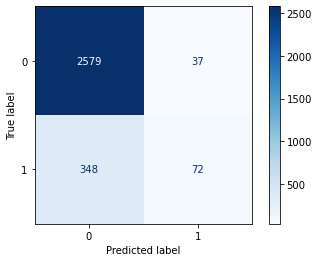

In [47]:
mass['arrested_predicted'], mass['arrested_probability'], f1_score_train, f1_score_test, precision_train, precision_test, recall_train, recall_test, cf_matrix = \
state_response_predictor(mass, features, 'arrests', logreg)

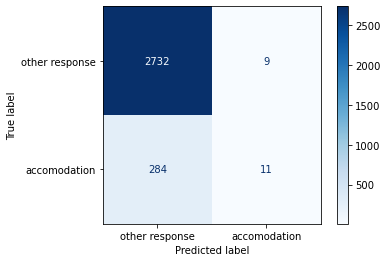

In [50]:
mass['accomodation_predicted'], mass['accomodation_probability'], f1_score_train, f1_score_test, precision_train, precision_test, recall_train, recall_test, cf_matrix = \
state_response_predictor(mass, features, 'accomodation', logreg)

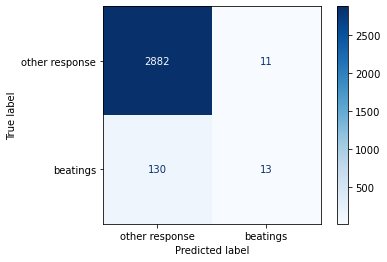

In [52]:
mass['beatings_predicted'], mass['beatings_probability'], f1_score_train, f1_score_test, precision_train, precision_test, recall_train, recall_test, cf_matrix = \
state_response_predictor(mass, features, 'beatings', logreg)

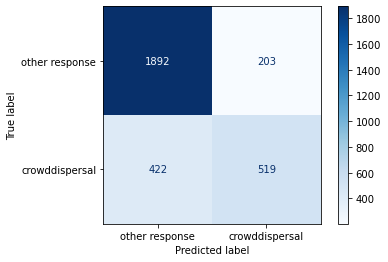

In [53]:
mass['crowddispersal_predicted'], mass['crowddispersal_probability'], f1_score_train, f1_score_test, precision_train, precision_test, recall_train, recall_test, cf_matrix = \
state_response_predictor(mass, features, 'crowddispersal', logreg)

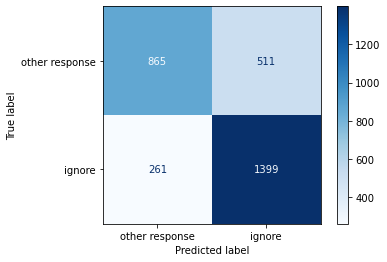

In [54]:
mass['ignore_predicted'], mass['ignore_probability'], f1_score_train, f1_score_test, precision_train, precision_test, recall_train, recall_test, cf_matrix = \
state_response_predictor(mass, features, 'ignore', logreg)

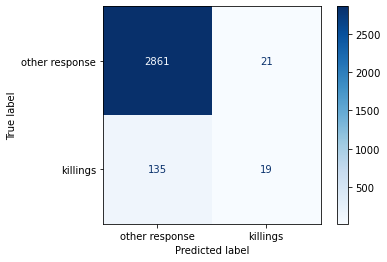

In [55]:
mass['killings_predicted'], mass['killings_probability'], f1_score_train, f1_score_test, precision_train, precision_test, recall_train, recall_test, cf_matrix = \
state_response_predictor(mass, features, 'killings', logreg)

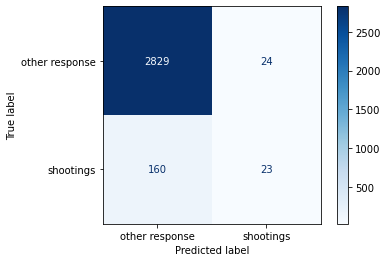

In [56]:
mass['shootings_predicted'], mass['shootings_probability'], f1_score_train, f1_score_test, precision_train, precision_test, recall_train, recall_test, cf_matrix= \
state_response_predictor(mass, features, 'shootings', logreg)

In [25]:
# Now our mass df has our predictions and probabilities for each row 
mass.head()

,id,country,ccode,region,protestnumber,protesterviolence,location,protesteridentity,sources,notes,...,beatings_predicted,beatings_probability,crowddispersal_predicted,crowddispersal_probability,ignore_predicted,ignore_probability,killings_predicted,killings_probability,shootings_predicted,shootings_probability
0,201990001,Canada,20,North America,1,0.0,national,unspecified,1. great canadian train journeys into history;...,canada s railway passenger system was finally ...,...,0,0.000192,0,0.084183,1,0.706858,0,0.004661,0,0.020385
1,201990002,Canada,20,North America,2,0.0,"Montreal, Quebec",unspecified,1. autonomy s cry revived in quebec the new yo...,protestors were only identified as young peopl...,...,0,0.000267,0,0.064621,1,0.749024,0,0.002015,0,0.011530
2,201990003,Canada,20,North America,3,0.0,"Montreal, Quebec",separatist parti quebecois,1. quebec protest after queen calls for unity ...,"the queen, after calling on canadians to remai...",...,0,0.000125,0,0.042880,1,0.807295,0,0.000728,0,0.003995
3,201990004,Canada,20,North America,4,1.0,"Montreal, Quebec",mohawk indians,1. indians gather as siege intensifies; armed ...,canada s federal government has agreed to acqu...,...,0,0.000685,1,0.526170,0,0.066220,0,0.123483,0,0.144650
4,201990005,Canada,20,North America,5,1.0,"Montreal, Quebec",local residents,1. dozens hurt in mohawk blockade protest the ...,protests were directed against the state due t...,...,0,0.000518,0,0.376901,0,0.166469,0,0.020468,0,0.069091


## Create DataFrame of various classification metrics for our model

In [27]:
# create dict
model_performance_dict = {
    'target':[],
    'f1_score_train':[],
    'f1_score_test':[],
    'precision_train':[],
    'precision_test':[],
    'recall_train':[],
    'recall_test':[] 
}

# call state_response_predictor() on each target

targets = ['arrests','accomodation','beatings','crowddispersal','ignore','killings','shootings']    
for target in targets:
    
    predicted_column, probability_column, f1_score_train, f1_score_test, precision_train, precision_test, recall_train, recall_test = state_response_predictor(
                                                                                                                                mass, 
                                                                                                                                features, 
                                                                                                                                target,logreg)
# append dictionary with scores                                                                                                                               
    model_performance_dict['target'].append(target)
#     model_performance_dict['class_balance'].append(mass[classifier].value_counts(normalize=True))
#     model_performance_dict['model'].append(model)
    model_performance_dict['f1_score_train'].append(f1_score_train)
    model_performance_dict['f1_score_test'].append(f1_score_test)
    model_performance_dict['precision_train'].append(precision_train)
    model_performance_dict['precision_test'].append(precision_test)
    model_performance_dict['recall_train'].append(recall_train)
    model_performance_dict['recall_test'].append(recall_test)
    
    
model_performance_df = pd.DataFrame(model_performance_dict)

In [28]:
# dataframe of classification metrics 
model_performance_df

,target,f1_score_train,f1_score_test,precision_train,precision_test,recall_train,recall_test
0,arrests,0.244303,0.272212,0.569002,0.660550,0.155543,0.171429
1,accomodation,0.099398,0.069841,0.647059,0.550000,0.053834,0.037288
2,beatings,0.171731,0.155689,0.650000,0.541667,0.098935,0.090909
3,crowddispersal,0.644623,0.624173,0.729954,0.718837,0.577155,0.551541
4,ignore,0.795409,0.783754,0.745848,0.732461,0.852026,0.842771
5,killings,0.241916,0.195876,0.612121,0.475000,0.150746,0.123377
6,shootings,0.240938,0.200000,0.594737,0.489362,0.151070,0.125683


## Results and Evaluations

In [59]:
list(mass.columns)

['id',
 'country',
 'ccode',
 'region',
 'protestnumber',
 'protesterviolence',
 'location',
 'protesteridentity',
 'sources',
 'notes',
 'protester_id_type',
 'partipants_number',
 'protest_size_category',
 'pop_male',
 'pop_female',
 'pop_total',
 'pop_density',
 'prosperity_2020',
 'country_Afghanistan',
 'country_Albania',
 'country_Algeria',
 'country_Angola',
 'country_Argentina',
 'country_Armenia',
 'country_Austria',
 'country_Azerbaijan',
 'country_Bahrain',
 'country_Bangladesh',
 'country_Belarus',
 'country_Belgium',
 'country_Benin',
 'country_Bolivia',
 'country_Bosnia',
 'country_Botswana',
 'country_Brazil',
 'country_Bulgaria',
 'country_Burkina Faso',
 'country_Burundi',
 'country_Cambodia',
 'country_Cameroon',
 'country_Canada',
 'country_Cape Verde',
 'country_Central African Republic',
 'country_Chad',
 'country_Chile',
 'country_China',
 'country_Colombia',
 'country_Comoros',
 'country_Congo Brazzaville',
 'country_Congo Kinshasa',
 'country_Costa Rica',
 'coun

In [62]:
mass[['arrests',
 'accomodation',
 'beatings',
 'crowddispersal',
 'ignore',
 'killings',
 'shootings', 'arrested_predicted',
 'arrested_probability',
 'accomodation_predicted',
 'accomodation_probability',
 'beatings_predicted',
 'beatings_probability',
 'crowddispersal_predicted',
 'crowddispersal_probability',
 'ignore_predicted',
 'ignore_probability',
 'killings_predicted',
 'killings_probability',
 'shootings_predicted',
 'shootings_probability']]

,arrests,accomodation,beatings,crowddispersal,ignore,killings,shootings,arrested_predicted,arrested_probability,accomodation_predicted,...,beatings_predicted,beatings_probability,crowddispersal_predicted,crowddispersal_probability,ignore_predicted,ignore_probability,killings_predicted,killings_probability,shootings_predicted,shootings_probability
0,0,0,0,0,1,0,0,0,0.148069,0,...,0,0.000192,0,0.084183,1,0.706858,0,0.004661,0,0.020385
1,0,0,0,0,1,0,0,0,0.132347,0,...,0,0.000267,0,0.064621,1,0.749024,0,0.002015,0,0.011530
2,0,0,0,0,1,0,0,0,0.082134,0,...,0,0.000125,0,0.042880,1,0.807295,0,0.000728,0,0.003995
3,0,1,0,0,0,0,0,1,0.585644,0,...,0,0.000685,1,0.526170,0,0.066220,0,0.123483,0,0.144650
4,1,1,0,1,0,0,0,0,0.370170,0,...,0,0.000518,0,0.376901,0,0.166469,0,0.020468,0,0.069091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15174,0,0,0,1,0,0,1,0,0.066307,0,...,0,0.000312,1,0.672472,0,0.127387,0,0.077788,0,0.129436
15175,0,0,0,1,0,1,1,0,0.085200,1,...,0,0.000646,1,0.791115,0,0.099178,0,0.110371,0,0.242530
15176,0,1,0,0,0,0,0,0,0.027931,0,...,0,0.000095,0,0.300164,1,0.583066,0,0.013474,0,0.014007
15177,0,0,0,1,0,0,0,0,0.063709,0,...,0,0.000329,1,0.698334,0,0.165523,0,0.043537,0,0.075894


In [32]:
np.exp(logreg.coef_)

array([[1.21326092, 1.02416104, 1.93158658, 0.90373019, 1.09657837,
        0.96320338, 1.02981317, 0.70380798, 0.42959904, 1.04111664,
        1.08290639, 0.95533957, 0.99922826, 1.11943874, 1.2370478 ,
        0.95266367, 1.21351045, 1.15924011, 1.2492223 , 0.84276385,
        0.91307265, 0.98440001, 1.16340076, 1.14311162, 0.81364103,
        1.18812018, 1.16008345, 1.04190451, 1.07569546, 1.1718769 ,
        1.03439099, 1.14336063, 0.97058924, 1.08718501, 1.04842842,
        0.74439098, 1.14634866, 1.14439894, 1.11245324, 1.03898772,
        1.06211819, 0.84447203, 0.91870499, 0.8470853 , 0.8392758 ,
        0.92181286, 0.97117101, 1.15258277, 1.03655496, 1.2147868 ,
        1.05021679, 1.15914404, 1.08258153, 0.92723408, 0.95459552,
        0.92469688, 1.05530854, 0.95765675, 0.69439608, 1.04085123,
        1.07498814, 1.32841159, 0.80960612, 0.9719742 , 0.97788404,
        1.10150438, 0.70971936, 1.05597625, 1.176608  , 1.00423213,
        1.18823411, 1.07110328, 1.09634831, 0.86

In [33]:
plot_confusion_matrix(mass, X_test, y_test)

NameError: name 'X_test' is not defined

In [39]:
plot_confusion_matrix(logreg, X_test_sc, y_test, cmap='Blues', display_labels=['alive', 'dead'])

NameError: name 'X_test_sc' is not defined

In [126]:
predictions_df = mass[['id','arrests', 'arrests_predicted', 'arrests_probability', 'accomodation', 'accomodation_predicted', 'accomodation_probability', 
      'beatings', 'beatings_predicted', 'beatings_probability', 'crowddispersal', 'crowddispersal_predicted', 'crowddispersal_probability', 
      'ignore', 'ignore_predicted', 'ignore_probability', 'killings', 'killings_predicted', 'killings_probability',
      'killings', 'killings_predicted', 'killings_probability']].copy()

In [127]:
predictions_df.head()

,id,arrests,arrests_predicted,arrests_probability,accomodation,accomodation_predicted,accomodation_probability,beatings,beatings_predicted,beatings_probability,...,crowddispersal_probability,ignore,ignore_predicted,ignore_probability,killings,killings_predicted,killings_probability,killings,killings_predicted,killings_probability
0,201990001,0,0,0.104568,0,0,0.174497,0,0,0.000192,...,0.078412,1,1,0.755349,0,0,0.006260,0,0,0.006260
1,201990002,0,0,0.191000,0,0,0.117303,0,0,0.000307,...,0.104708,1,1,0.692979,0,0,0.007246,0,0,0.007246
2,201990003,0,0,0.205189,0,0,0.052175,0,0,0.000267,...,0.096429,1,1,0.687309,0,0,0.008844,0,0,0.008844
3,201990004,0,1,0.533197,1,0,0.156799,0,0,0.000359,...,0.379723,0,0,0.055110,0,0,0.103104,0,0,0.103104
4,201990005,1,0,0.421843,1,0,0.085363,0,0,0.000595,...,0.452339,0,0,0.138899,0,0,0.041307,0,0,0.041307


In [128]:
predictions_df.to_csv('../data/04_predictions_only.csv', index=False)

In [139]:
model_performance_dict = {
    'target':[],
#     'model':[],
    'f1_score_train':[],
    'f1_score_test':[],
    'precision_train':[],
    'precision_test':[],
    'recall_train':[],
    'recall_test':[] 
}

# ['arrests','accomodation','beatings','crowddispersal','ignore','killings','shootings']
# ['arrests_BC', 'accomodation_BC', 'beatings_BC', 'crowddispersal_BC', 'ignore_BC', 'killings_BC', 'shootings_BC']
 
targets = ['arrests','accomodation','beatings','crowddispersal','ignore','killings','shootings']    
    
for target in targets:
    
    predicted_column, probability_column, f1_score_train, f1_score_test, precision_train, precision_test, recall_train, recall_test = state_response_predictor(
                                                                                                                                mass, 
                                                                                                                                features_1, 
                                                                                                                                target, 
                                                                                                                                LogisticRegression_1)
    
    model_performance_dict['target'].append(target)
#     model_performance_dict['class_balance'].append(mass[classifier].value_counts(normalize=True))
#     model_performance_dict['model'].append(model)
    model_performance_dict['f1_score_train'].append(f1_score_train)
    model_performance_dict['f1_score_test'].append(f1_score_test)
    model_performance_dict['precision_train'].append(precision_train)
    model_performance_dict['precision_test'].append(precision_test)
    model_performance_dict['recall_train'].append(recall_train)
    model_performance_dict['recall_test'].append(recall_test)
    
print(model_performance_dict)
    
# model_performance_df = pd.DataFrame(model_performance_dict)

arrests- F1_score for LogisticRegression(max_iter=1000) model, train set: 0.1408450704225352
arrests- F1_score for LogisticRegression(max_iter=1000) model, test set: 0.1310211946050096
arrests- Precision for LogisticRegression(max_iter=1000) model, train set: 0.5895196506550219
arrests- Precision for LogisticRegression(max_iter=1000) model, test set: 0.5666666666666667
arrests- Recall for LogisticRegression(max_iter=1000) model, train set: 0.07997630331753554
arrests- Recall for LogisticRegression(max_iter=1000) model, teset set: 0.07407407407407407
LogisticRegression(max_iter=1000)
accomodation- F1_score for LogisticRegression(max_iter=1000) model, train set: 0.03843074459567654
accomodation- F1_score for LogisticRegression(max_iter=1000) model, test set: 0.053571428571428575
accomodation- Precision for LogisticRegression(max_iter=1000) model, train set: 0.5454545454545454
accomodation- Precision for LogisticRegression(max_iter=1000) model, test set: 0.6
accomodation- Recall for Logis

In [140]:
model_performance_df = pd.DataFrame(model_performance_dict)
model_performance_df

,target,f1_score_train,f1_score_test,precision_train,precision_test,recall_train,recall_test
0,arrests,0.140845,0.131021,0.589520,0.566667,0.079976,0.074074
1,accomodation,0.038431,0.053571,0.545455,0.600000,0.019917,0.028037
2,beatings,0.118812,0.144444,0.656250,0.650000,0.065319,0.081250
3,crowddispersal,0.657023,0.608595,0.737338,0.664975,0.592486,0.561028
4,ignore,0.794378,0.780434,0.733632,0.722594,0.866093,0.848338
5,killings,0.171206,0.124352,0.578947,0.480000,0.100457,0.071429
6,shootings,0.211765,0.172249,0.568966,0.486486,0.130092,0.104651


In [90]:
model_performance_dict = {}
 
for classifier in ['arrests','accomodation','beatings','crowddispersal','ignore','killings','shootings']:
    
    predicted_column, probability_column, f1_score_train, f1_score_test, precision_train, precision_test, recall_train, recall_test = state_response_predictor(
                                                                                                                                mass, 
                                                                                                                                features_1, 
                                                                                                                                classifier, 
                                                                                                                                LogisticRegression_1)
     
    model_performance_dict['Classifier'].append(classifier)
#     model_performance_dict['class_balance'] = mass[classifier].value_counts(normalize=True))
    model_performance_dict['model'] = model
    model_performance_dict['f1_score_train'].append(f1_score_train)
    model_performance_dict['f1_score_test'].append(f1_score_test)
    
    model_performance_dict['precision_train'] = precision_train
    model_performance_dict['precision_test'] = precision_test
    model_performance_dict['recall_train'] = recall_train
    model_performance_dict['recall_test'] = recall_test
    
print(model_performance_dict)

arrests- F1_score for LogisticRegression(max_iter=1000) model, train set: 0.2027871215761653
arrests- F1_score for LogisticRegression(max_iter=1000) model, test set: 0.18148820326678766
arrests- Precision for LogisticRegression(max_iter=1000) model, train set: 0.5368956743002544
arrests- Precision for LogisticRegression(max_iter=1000) model, test set: 0.5434782608695652
arrests- Recall for LogisticRegression(max_iter=1000) model, train set: 0.125
arrests- Recall for LogisticRegression(max_iter=1000) model, teset set: 0.10893246187363835
LogisticRegression(max_iter=1000)
accomodation- F1_score for LogisticRegression(max_iter=1000) model, train set: 0.03522818254603683
accomodation- F1_score for LogisticRegression(max_iter=1000) model, test set: 0.041666666666666664
accomodation- Precision for LogisticRegression(max_iter=1000) model, train set: 0.5
accomodation- Precision for LogisticRegression(max_iter=1000) model, test set: 0.4666666666666667
accomodation- Recall for LogisticRegression

In [91]:
model_performance_df = pd.DataFrame(model_performance_dict)
model_performance_df

ValueError: If using all scalar values, you must pass an index

In [75]:
mass['arrests'].value_counts(normalize=True)[1]

0    0.858982
1    0.141018
Name: arrests, dtype: float64

In [76]:
mass['ignore'].value_counts(normalize=True)

1    0.543777
0    0.456223
Name: ignore, dtype: float64

In [77]:
mass['beatings'].value_counts(normalize=True)

0    0.947258
1    0.052742
Name: beatings, dtype: float64

In [78]:
mass['shootings'].value_counts(normalize=True)

0    0.938719
1    0.061281
Name: shootings, dtype: float64

In [79]:
mass['killings'].value_counts(normalize=True)

0    0.945813
1    0.054187
Name: killings, dtype: float64

In [80]:
mass['accomodation'].value_counts(normalize=True)

0    0.89977
1    0.10023
Name: accomodation, dtype: float64

In [81]:
mass['crowddispersal'].value_counts(normalize=True)

0    0.686897
1    0.313103
Name: crowddispersal, dtype: float64

In [129]:
# logreg_cvec_pipe = Pipeline([
#         ('cvec', CountVectorizer(stop_words=all_stop_words)),
#         ('logreg', LogisticRegression())
#     ])

# logreg = LogisticRegression()

# params = {
#     'C': [0.01, 0.1, 1, 10, 100],
#     'penalty' : ['l1', 'l2'],
#     'solver': ['lbfgs', 'saga']
# }

# log_reg_grid = GridSearchCV(logreg, 
#                    params,
#                    cv = 5,
#                    verbose = 2,
#                    n_jobs=2)

# logreg_cvec_grid.fit(X_train, y_train)